<a href="https://colab.research.google.com/github/RoloNatt/Patient-Survival-Prediction/blob/main/Patient_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Dataset.csv")

In [ ]:
dictionary =  pd.read_csv("Data Dictionary.csv")

In [ ]:
# Set the option to display all the columns
pd.options.display.max_rows = None

In [ ]:
df.head()

encounter_id  patient_id  hospital_id  hospital_death   age    bmi  \
0         66154       25312          118               0  68.0  22.73   
1        114252       59342           81               0  77.0  27.42   
2        119783       50777          118               0  25.0  31.95   
3         79267       46918          118               0  81.0  22.64   
4         92056       34377           33               0  19.0    NaN   

   elective_surgery  ethnicity gender  height  ... aids cirrhosis  \
0                 0  Caucasian      M   180.3  ...  0.0       0.0   
1                 0  Caucasian      F   160.0  ...  0.0       0.0   
2                 0  Caucasian      F   172.7  ...  0.0       0.0   
3                 1  Caucasian      F   165.1  ...  0.0       0.0   
4                 0  Caucasian      M   188.0  ...  0.0       0.0   

   diabetes_mellitus hepatic_failure immunosuppression  leukemia  lymphoma  \
0                1.0             0.0               0.0       0.0       0.0   
1                1.0             0.0               0.0       0.0       0.0   
2                0.0             0.0               0.0       0.0       0.0   
3                0.0             0.0               0.0       0.0       0.0   
4                0.0             0.0               0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                          0.0                Sepsis       Cardiovascular  
1                          0.0           Respiratory          Respiratory  
2                          0.0             Metabolic            Metabolic  
3                          0.0        Cardiovascular       Cardiovascular  
4                          0.0                Trauma               Trauma  

[5 rows x 186 columns]

In [ ]:
df.shape

(16334, 186)

In [ ]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16334 entries, 0 to 16333
Data columns (total 186 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    encounter_id                   16334 non-null  int64  
 1    patient_id                     16334 non-null  int64  
 2    hospital_id                    16334 non-null  int64  
 3    hospital_death                 16334 non-null  int64  
 4    age                            15541 non-null  float64
 5    bmi                            14348 non-null  float64
 6    elective_surgery               16334 non-null  int64  
 7    ethnicity                      15961 non-null  object 
 8    gender                         16325 non-null  object 
 9    height                         16034 non-null  float64
 10   hospital_admit_source          14710 non-null  object 
 11   icu_admit_source               16299 non-null  object 
 12   icu_id                        

<ipython-input-7-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [ ]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

In [ ]:
target_var = 'hospital_death'

In [ ]:
# categorical columns
df.describe(include=['O']).T

count unique                   top   freq
ethnicity              15961      6             Caucasian  12401
gender                 16325      2                     M   8711
hospital_admit_source  14710     10  Emergency Department   7493
icu_admit_source       16299      5  Accident & Emergency   9813
icu_stay_type          16334      3                 admit  16087
icu_type               16334      7          Med-Surg ICU  10165
apache_3j_bodysystem   15991     11        Cardiovascular   5697
apache_2_bodysystem    15991     10        Cardiovascular   7351

In [ ]:
# group features in df according to the categories in dictionary
# create a dictionary to map variable names to categories
var_to_cat = dictionary.set_index('Variable Name')['Category'].to_dict()

# group the columns of df1 based on categories
grouped_df1 = df.groupby(var_to_cat, axis=1)

In [ ]:
categories = dictionary['Category'].unique()
print(f"Categories: {categories}")

Categories: ['identifier' 'demographic' 'APACHE covariate' 'vitals' 'labs'
 'labs blood gas' 'APACHE prediction' 'APACHE comorbidity'
 'APACHE grouping' 'GOSSIS example prediction']


In [ ]:
print('icu_admit_type' in df.columns)

False


In [ ]:
# Create new DataFrame for each category
for category in dictionary['Category'].unique():
    category_columns = dictionary.loc[dictionary['Category'] == category, 'Variable Name'].tolist()
    available_columns = list(set(df.columns) & set(category_columns)) # Check which columns are available in df
    available_columns.append(target_var)  # Add hospital_death column to category_columns list
    category_name = category.lower().replace(' ', '_')
    globals()[category_name + '_df'] = df[available_columns].copy()

# Find columns not present in any created dataframes
existing_columns = set()
for category in dictionary['Category'].unique():
    category_name = category.lower().replace(' ', '_')
    existing_columns.update(globals()[category_name + '_df'].columns)
other_columns = set(df.columns) - existing_columns

# Create 'other_df' with columns not present in any created dataframes
other_columns = list(other_columns)
other_columns.append(target_var)  # Add target_var column
other_df = df[other_columns].copy()


In [ ]:
category = 'demographic'
category_df = demographic_df

In [ ]:
category_rows = dictionary['Category'] == category
category_columns = ['Variable Name', 'Description']
print(dictionary.loc[category_rows, category_columns])

            Variable Name                                        Description
3          hospital_death  Whether the patient died during this hospitali...
4                     age           The age of the patient on unit admission
5                     bmi  The body mass index of the person on unit admi...
6        elective_surgery  Whether the patient was admitted to the hospit...
7               ethnicity  The common national or cultural tradition whic...
8                  gender                 The genotypical sex of the patient
9                  height         The height of the person on unit admission
10  hospital_admit_source  The location of the patient prior to being adm...
11       icu_admit_source  The location of the patient prior to being adm...
12         icu_admit_type         The type of unit admission for the patient
13                 icu_id  A unique identifier for the unit to which the ...
14          icu_stay_type                                                NaN

In [ ]:
category_df.isna().sum()

hospital_death              0
icu_stay_type               0
ethnicity                 373
elective_surgery            0
hospital_admit_source    1624
bmi                      1986
height                    300
readmission_status          0
weight                   1845
gender                      9
icu_admit_source           35
age                       793
pre_icu_los_days            0
icu_type                    0
icu_id                      0
hospital_death              0
dtype: int64

In [ ]:
category_df.nunique()

hospital_death              2
icu_stay_type               3
ethnicity                   6
elective_surgery            2
hospital_admit_source      10
bmi                      9201
height                    215
readmission_status          1
weight                   1809
gender                      2
icu_admit_source            5
age                        74
pre_icu_los_days         3427
icu_type                    7
icu_id                     59
hospital_death              2
dtype: int64

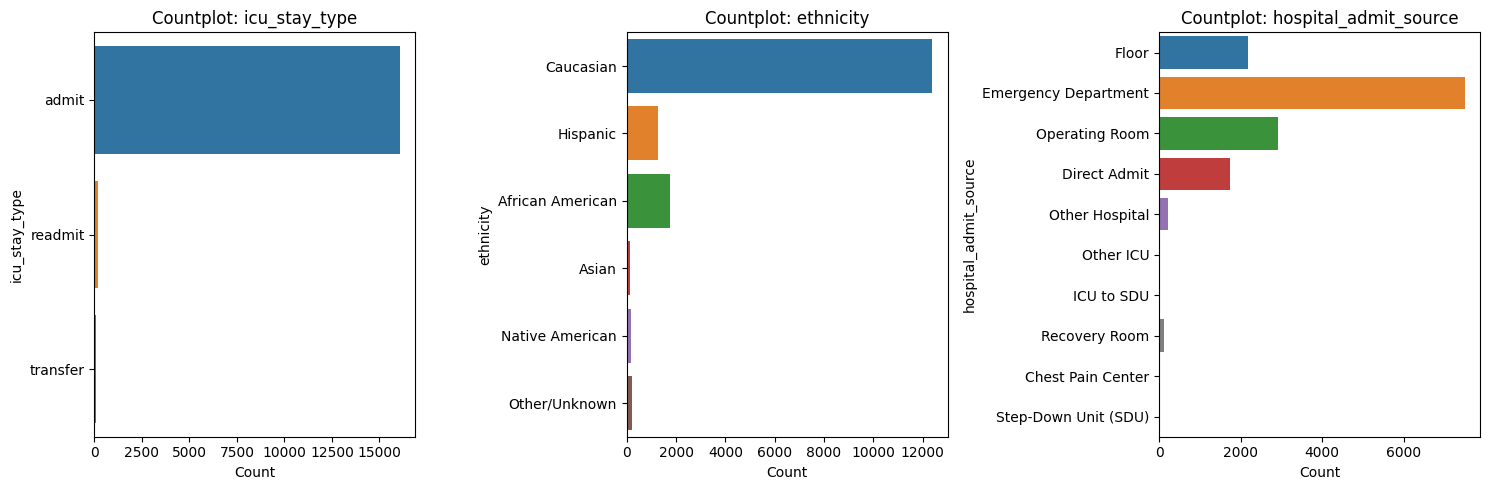

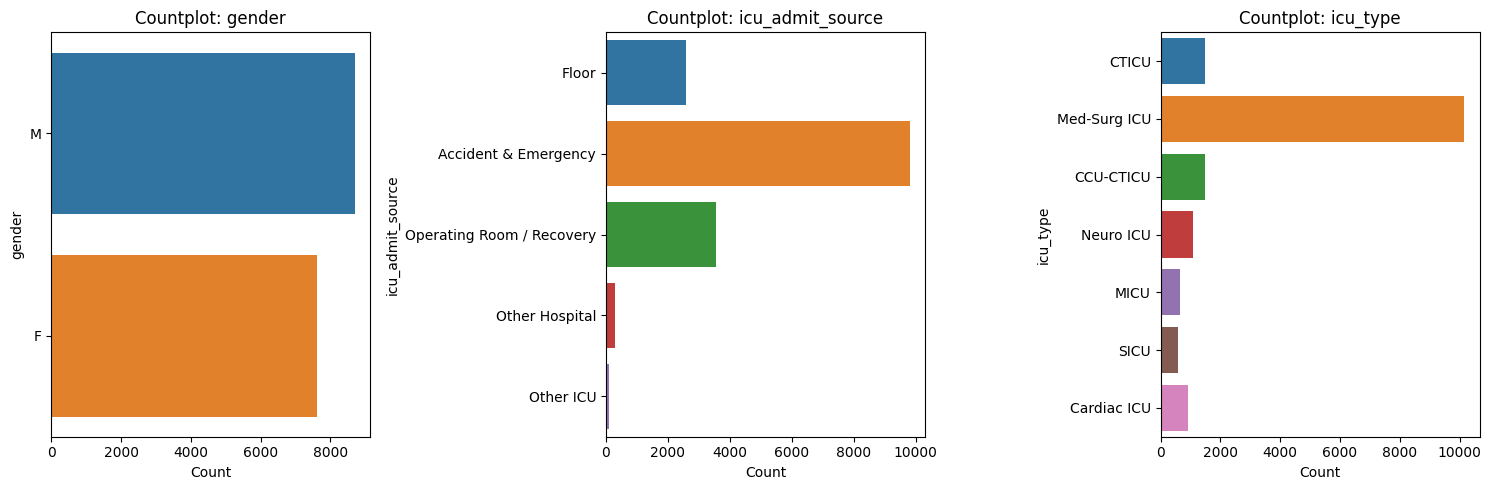

In [ ]:
# countplot for categorical features
categorical_columns = category_df.select_dtypes(include='object').columns
num_columns = len(categorical_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

for i, col in enumerate(categorical_columns):
    if i % 3 == 0:
        plt.figure(figsize=(15, 5))  # Adjust the figure size if needed

    plt.subplot(1, 3, (i % 3) + 1)
    if category_df[col].nunique() <= 50:
        sns.countplot(y=col, data=category_df)
    else:
        sns.countplot(x=col, data=category_df)
        plt.xticks(rotation=90)  # Rotate x-axis labels if needed

    plt.title(f'Countplot: {col}')
    plt.xlabel('Count')

    if i % 3 == 2 or i == num_columns - 1:
        plt.tight_layout()  # Adjust the spacing between subplots
        plt.show()


In [ ]:
# Check the data types of the columns in category_df
print(category_df.dtypes)

hospital_death             int64
icu_stay_type             object
ethnicity                 object
elective_surgery           int64
hospital_admit_source     object
bmi                      float64
height                   float64
readmission_status         int64
weight                   float64
gender                    object
icu_admit_source          object
age                      float64
pre_icu_los_days         float64
icu_type                  object
icu_id                     int64
hospital_death             int64
dtype: object


In [ ]:
# Remove duplicate column 'hospital_death' from the DataFrame
category_df = category_df.loc[:, ~category_df.columns.duplicated()]

In [ ]:
# Count the number of classification columns
classification_columns = category_df.select_dtypes(include='object').columns
num_classification_columns = len(classification_columns)

# Count the number of regression columns
regression_columns = category_df.select_dtypes(exclude='object').columns
num_regression_columns = len(regression_columns)

print("Number of Classification Columns:", num_classification_columns)
print("Number of Regression Columns:", num_regression_columns)


Number of Classification Columns: 0
Number of Regression Columns: 29


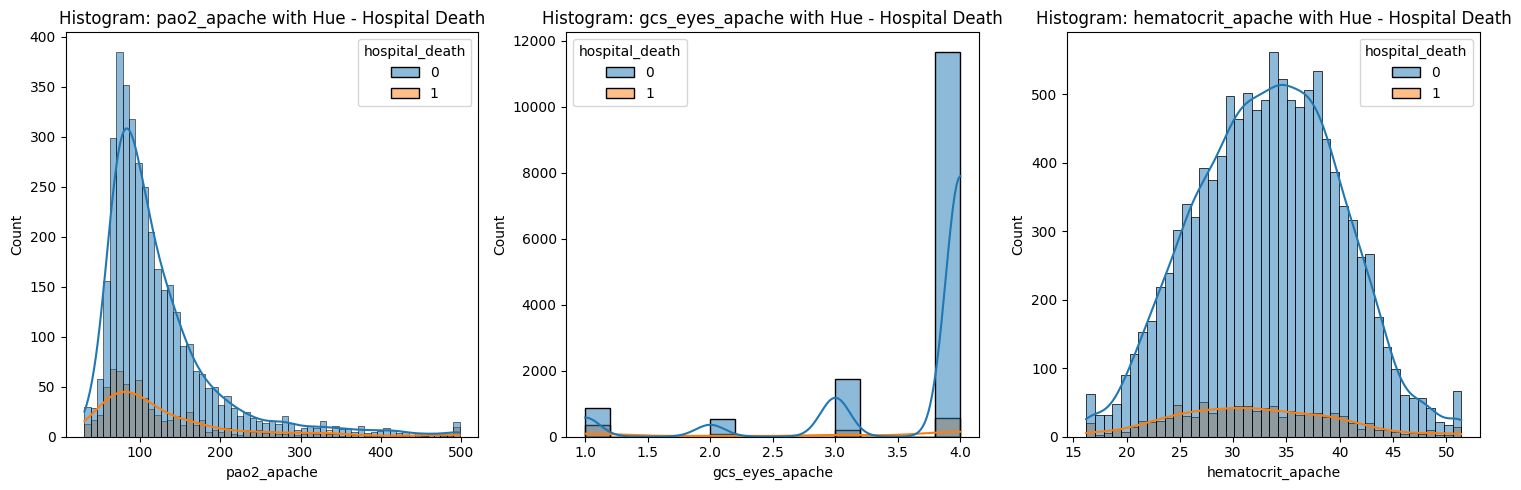

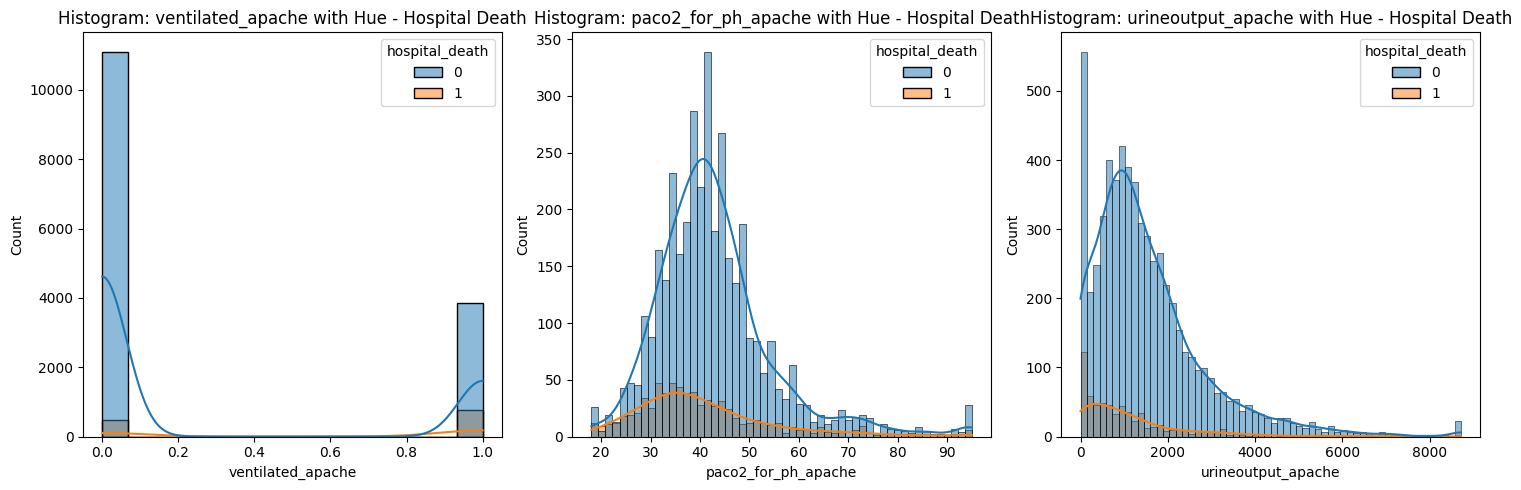

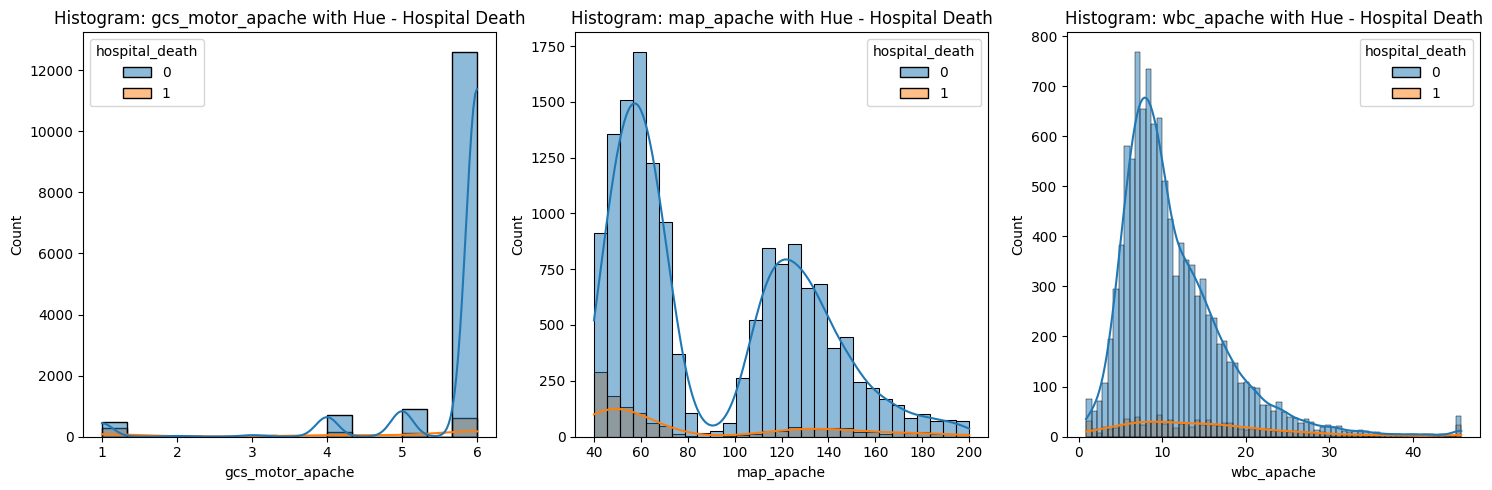

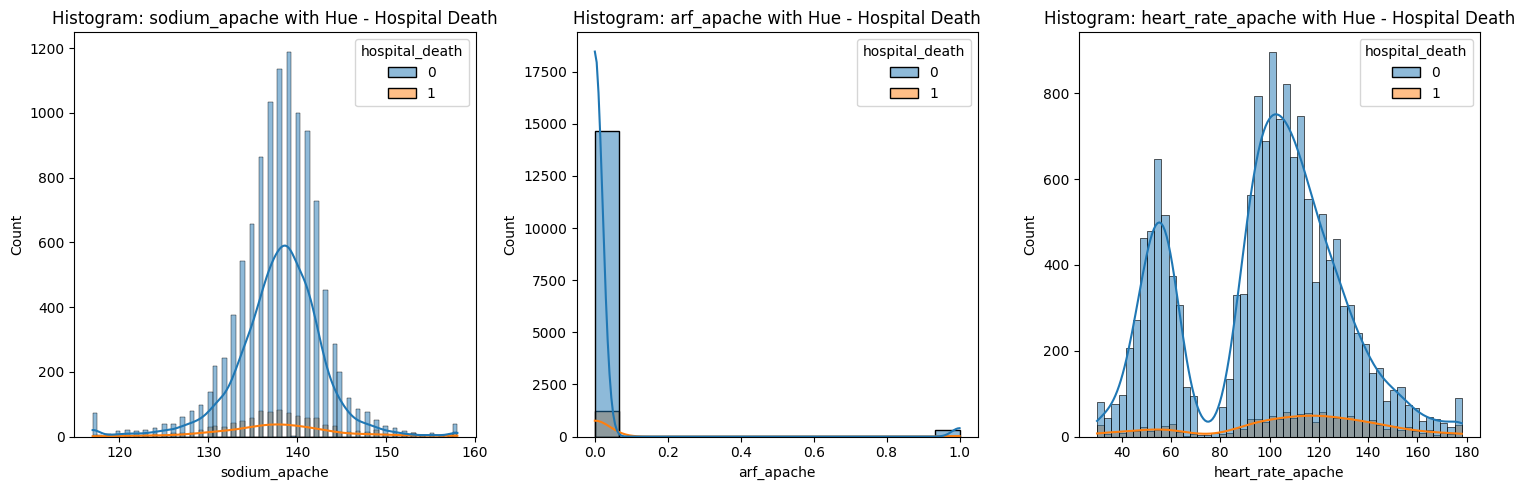

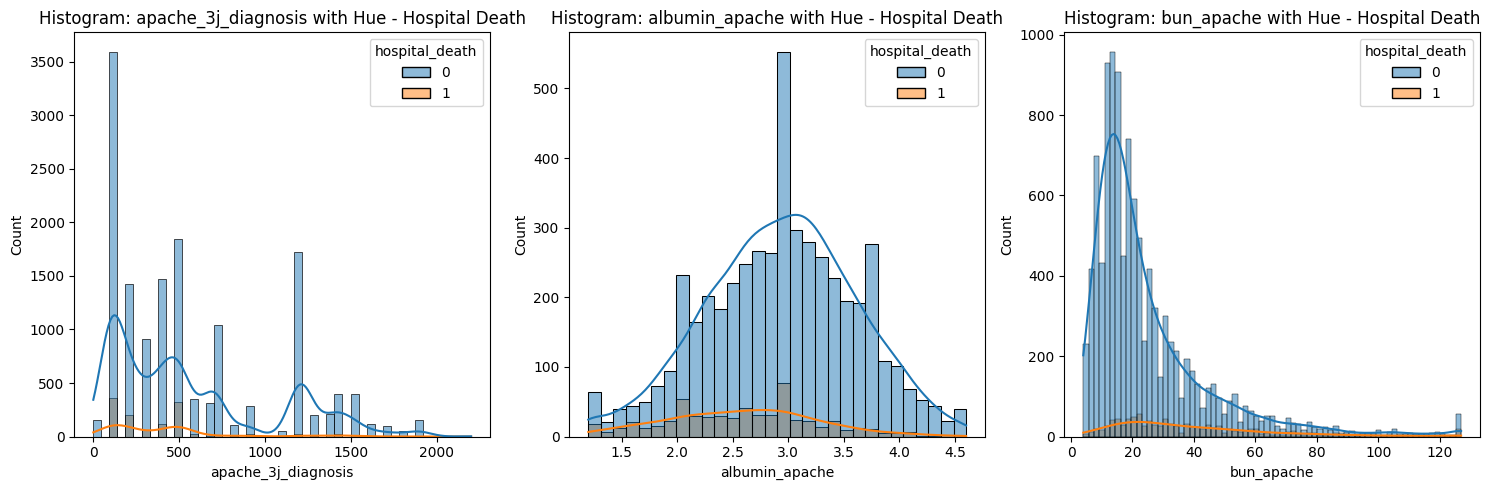

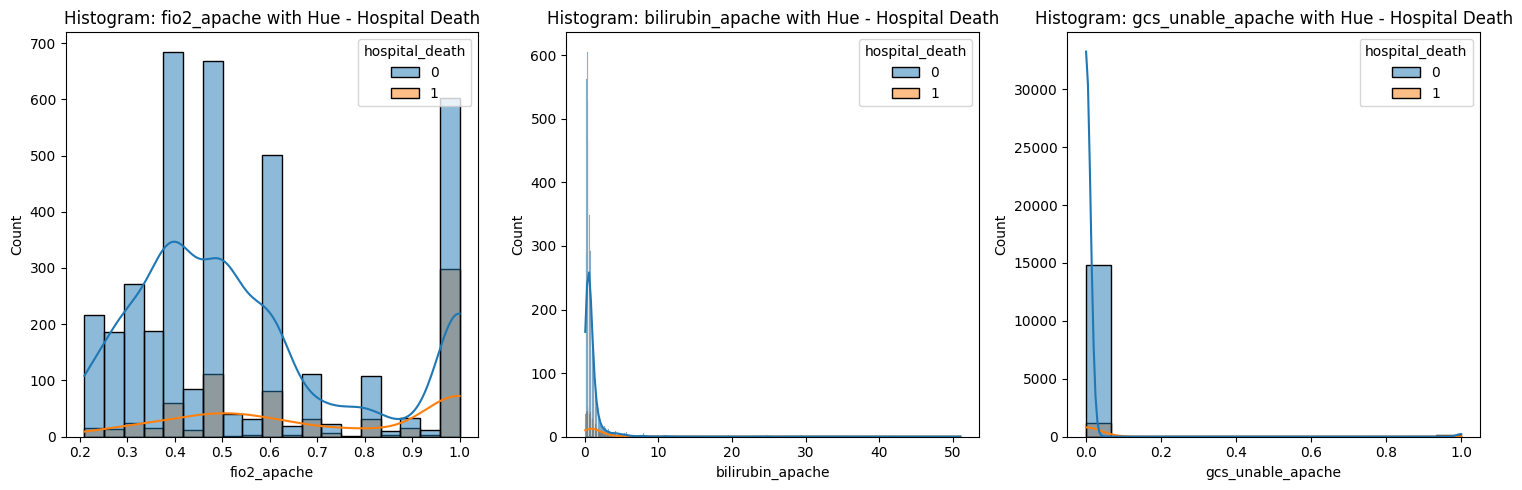

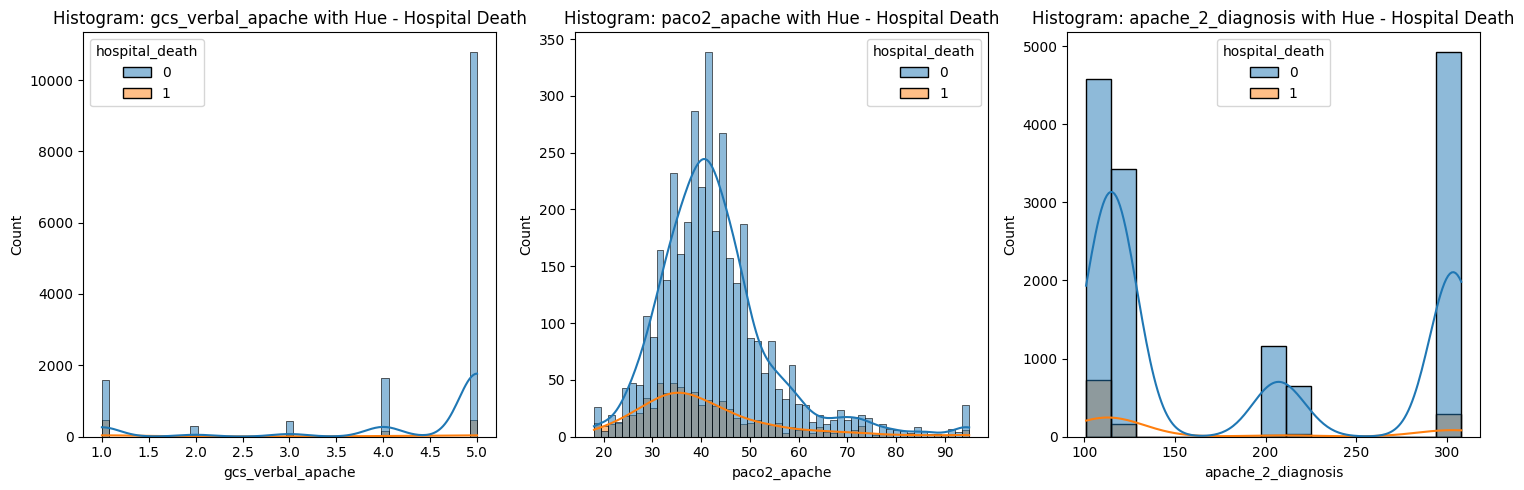

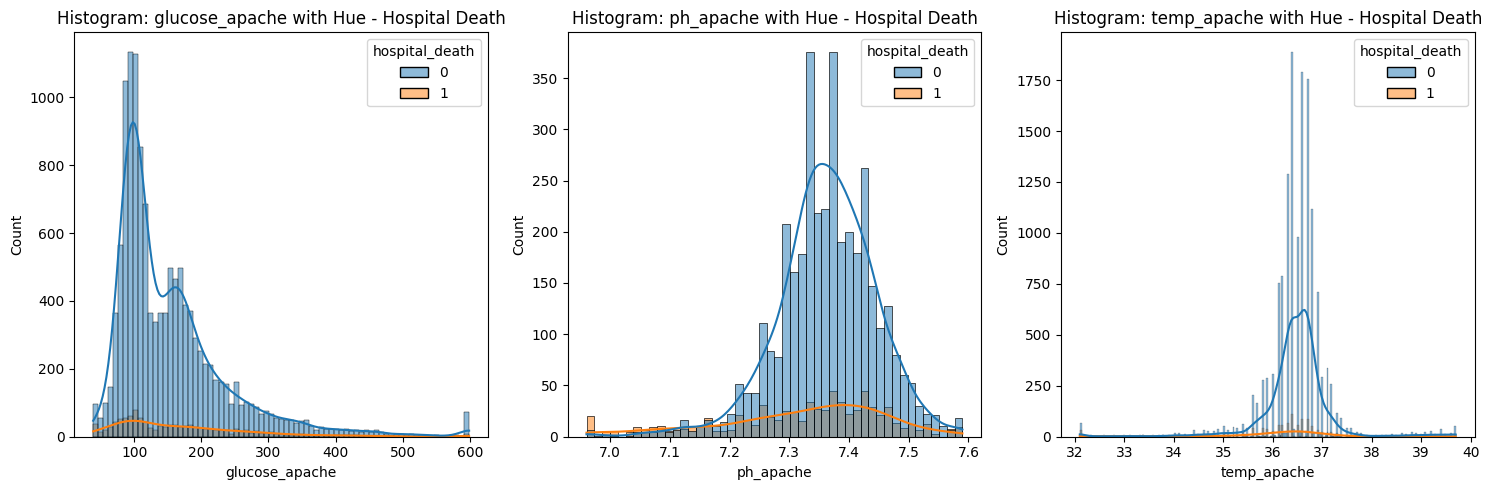

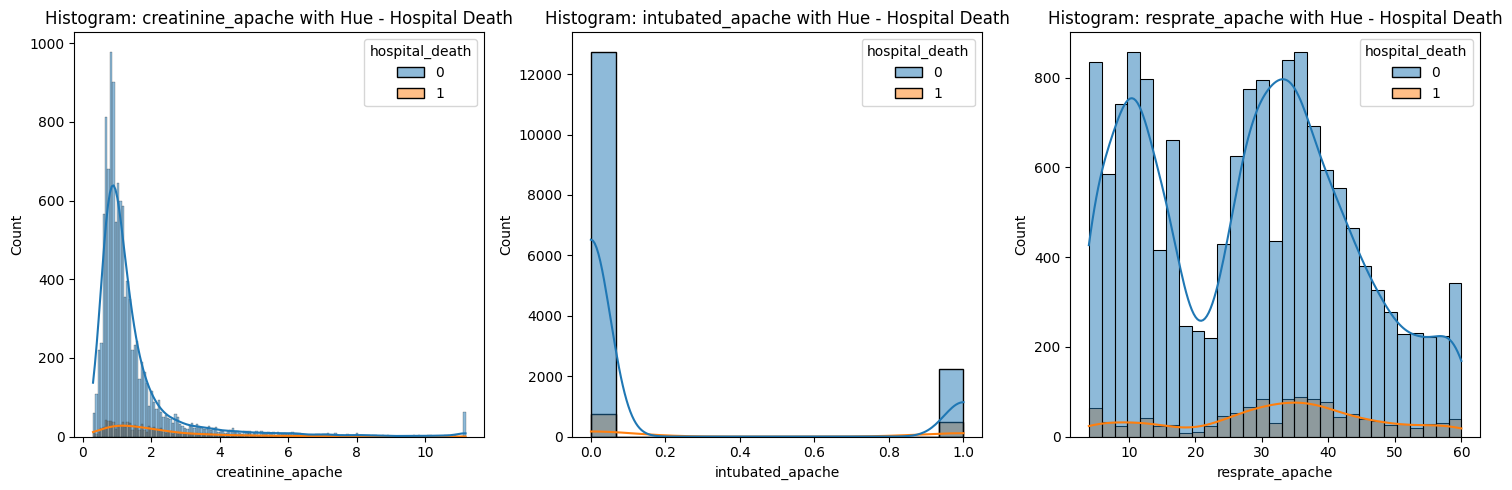

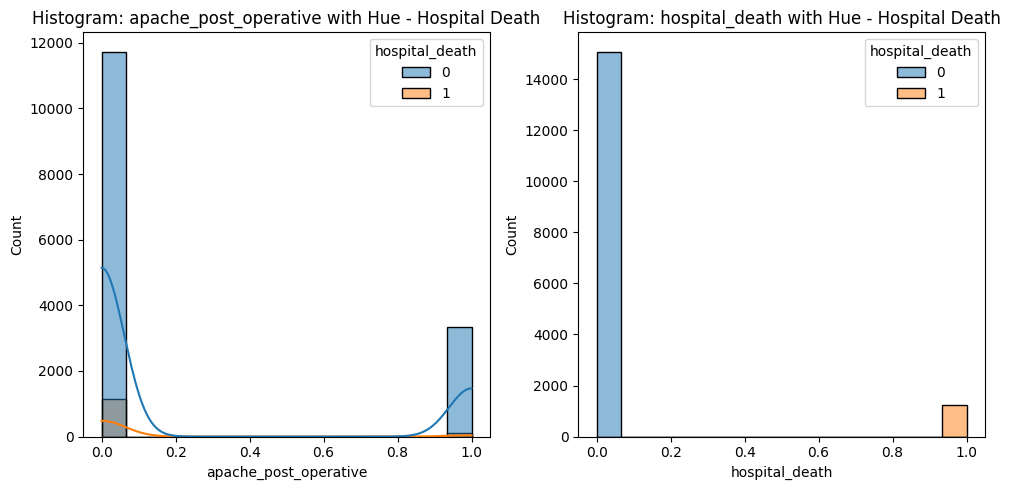

In [ ]:
# Get the regression columns from the DataFrame (excluding the target variable column)
regression_columns = category_df.columns[category_df.dtypes != 'object'].tolist()

num_columns = len(regression_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

# Create histograms for each regression column
for i, column in enumerate(regression_columns):
    if i % 3 == 0:
        plt.figure(figsize=(15, 5))  # Adjust the figure size if needed

    plt.subplot(1, 3, (i % 3) + 1)
    sns.histplot(data=category_df, x=column, hue=target_var, kde=True)
    plt.title(f'Histogram: {column} with Hue - Hospital Death')
    plt.xlabel(column)
    plt.ylabel('Count')
    

    if i % 3 == 2 or i == num_columns - 1:
        plt.tight_layout()  # Adjust the spacing between subplots
        plt.show()


In [ ]:
category = 'APACHE covariate'
category_df = apache_covariate_df

In [ ]:
category_rows = dictionary['Category'] == category
category_columns = ['Variable Name', 'Description']
print(dictionary.loc[category_rows, category_columns])

            Variable Name                                        Description
19         albumin_apache  The albumin concentration measured during the ...
20     apache_2_diagnosis      The APACHE II diagnosis for the ICU admission
21    apache_3j_diagnosis  The APACHE III-J sub-diagnosis code which best...
22  apache_post_operative  The APACHE operative status; 1 for post-operat...
23             arf_apache  Whether the patient had acute renal failure du...
24       bilirubin_apache  The bilirubin concentration measured during th...
25             bun_apache  The blood urea nitrogen concentration measured...
26      creatinine_apache  The creatinine concentration measured during t...
27            fio2_apache  The fraction of inspired oxygen from the arter...
28        gcs_eyes_apache  The eye opening component of the Glasgow Coma ...
29       gcs_motor_apache  The motor component of the Glasgow Coma Scale ...
30      gcs_unable_apache  Whether the Glasgow Coma Scale was unable to b...

In [ ]:
category_df.isna().sum()

pao2_apache              11814
gcs_eyes_apache            332
hematocrit_apache         3763
ventilated_apache          118
paco2_for_ph_apache      11814
urineoutput_apache        9532
gcs_motor_apache           332
map_apache                 203
wbc_apache                4372
sodium_apache             4307
arf_apache                 118
heart_rate_apache          145
apache_3j_diagnosis        188
albumin_apache           10856
bun_apache                4405
fio2_apache              11814
bilirubin_apache         11152
gcs_unable_apache          198
gcs_verbal_apache          332
paco2_apache             11814
apache_2_diagnosis         342
glucose_apache            2296
ph_apache                11814
temp_apache                416
creatinine_apache         4035
intubated_apache           118
resprate_apache            201
apache_post_operative        0
hospital_death               0
dtype: int64

In [ ]:
category_df.nunique()

pao2_apache              1229
gcs_eyes_apache             4
hematocrit_apache         351
ventilated_apache           2
paco2_for_ph_apache       483
urineoutput_apache       5603
gcs_motor_apache            6
map_apache                160
wbc_apache                773
sodium_apache              43
arf_apache                  2
heart_rate_apache         147
apache_3j_diagnosis       345
albumin_apache             35
bun_apache                127
fio2_apache                55
bilirubin_apache          152
gcs_unable_apache           2
gcs_verbal_apache           5
paco2_apache              483
apache_2_diagnosis         44
glucose_apache            498
ph_apache                 419
temp_apache               124
creatinine_apache         724
intubated_apache            2
resprate_apache            57
apache_post_operative       2
hospital_death              2
dtype: int64

In [ ]:
# Count the number of classification columns
classification_columns = category_df.select_dtypes(include='object').columns
num_classification_columns = len(classification_columns)

# Count the number of regression columns
regression_columns = category_df.select_dtypes(exclude='object').columns
num_regression_columns = len(regression_columns)

print("Number of Classification Columns:", num_classification_columns)
print("Number of Regression Columns:", num_regression_columns)

Number of Classification Columns: 0
Number of Regression Columns: 29


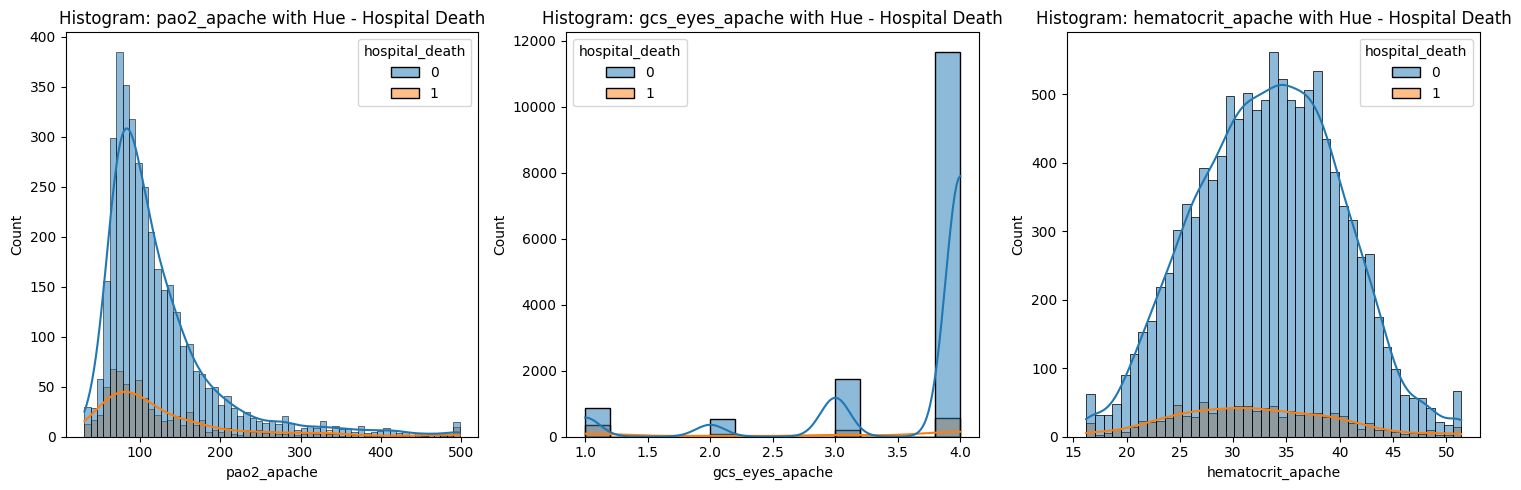

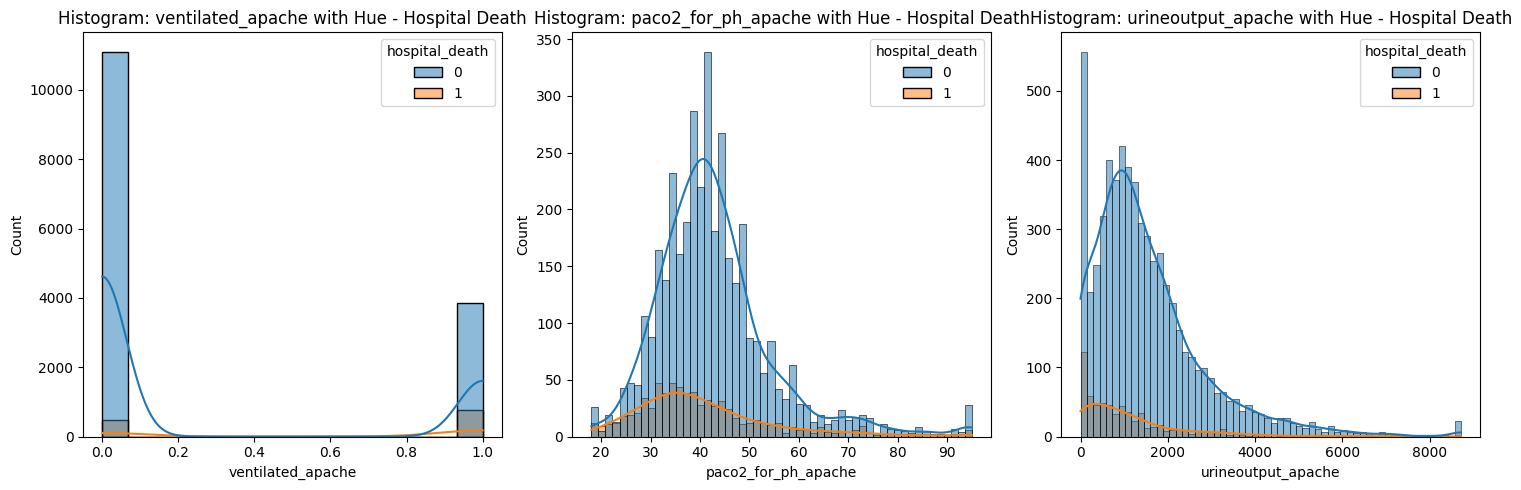

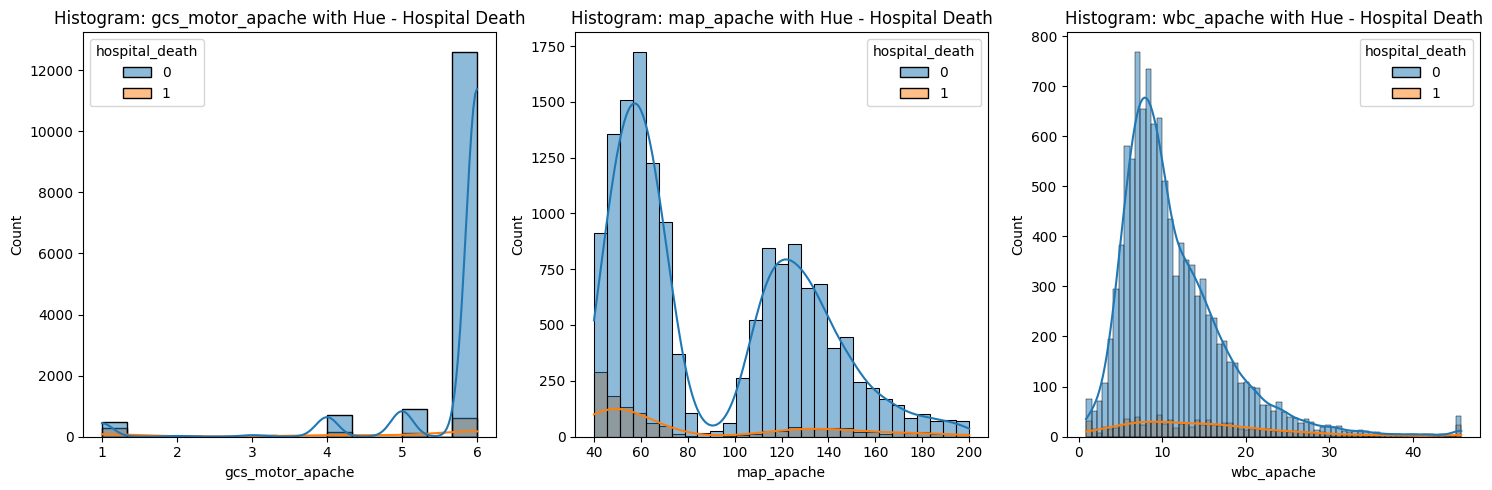

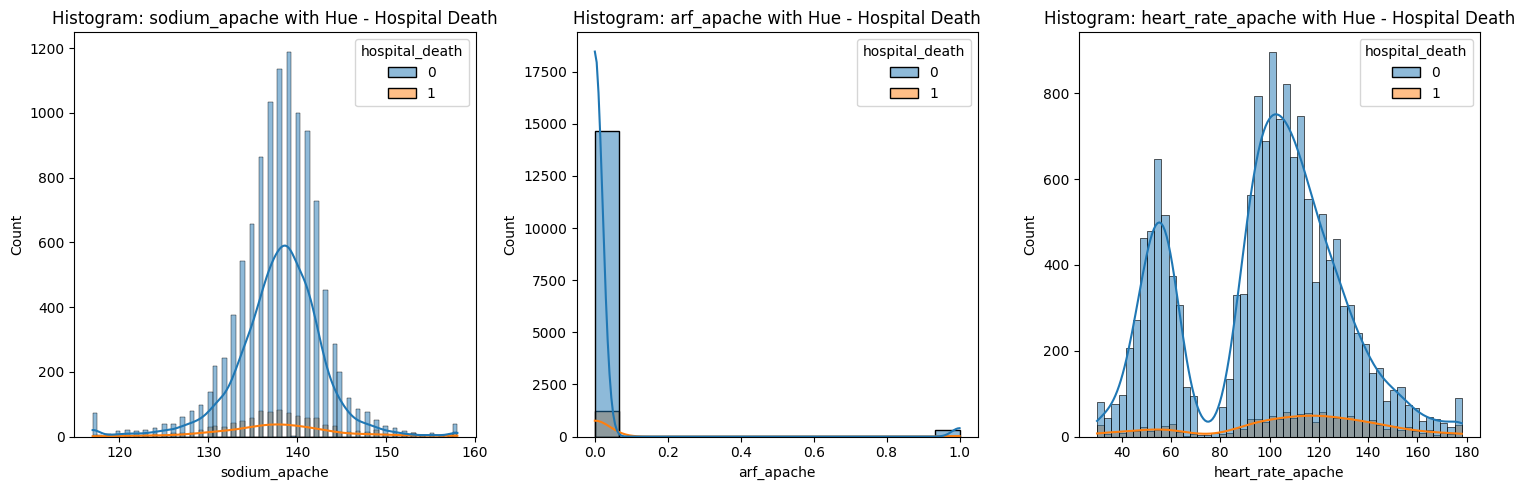

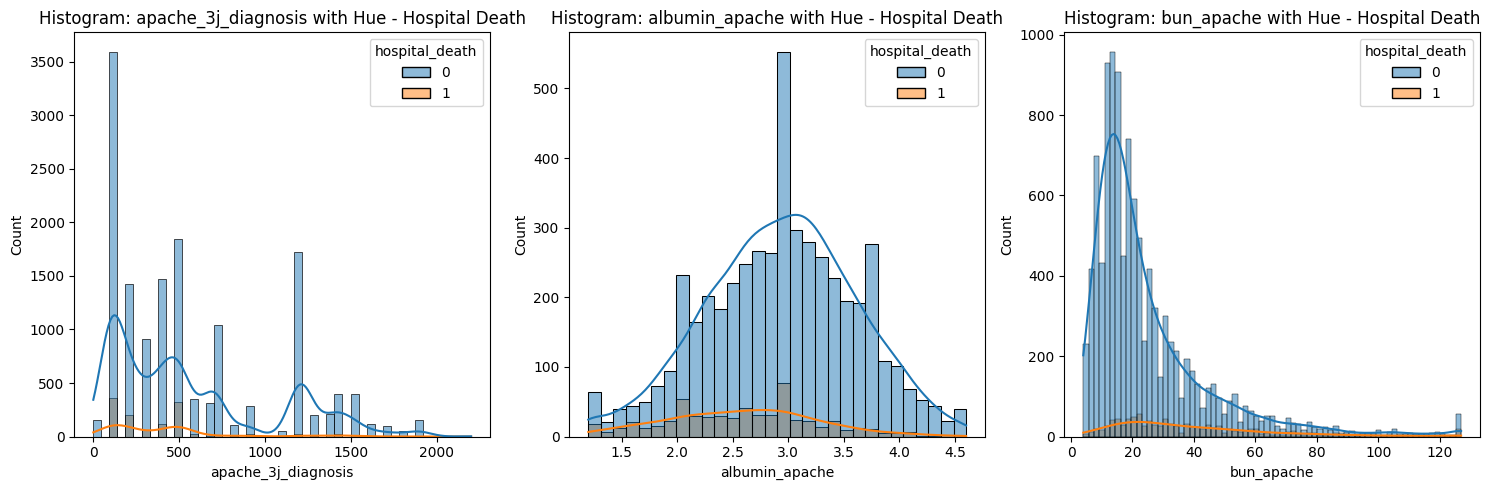

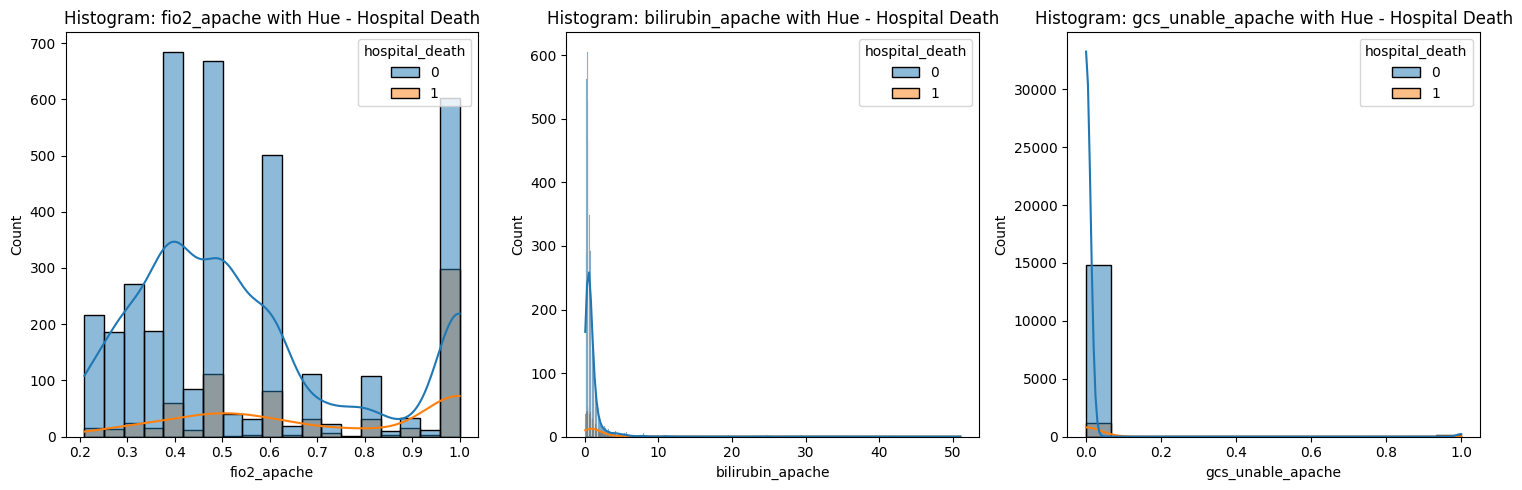

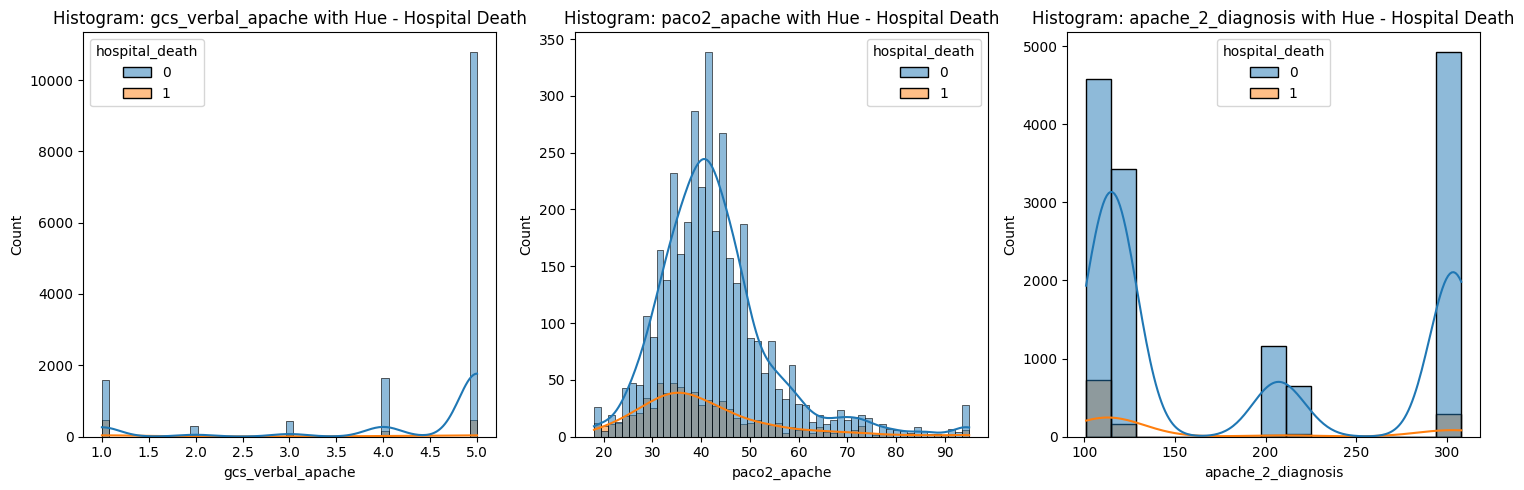

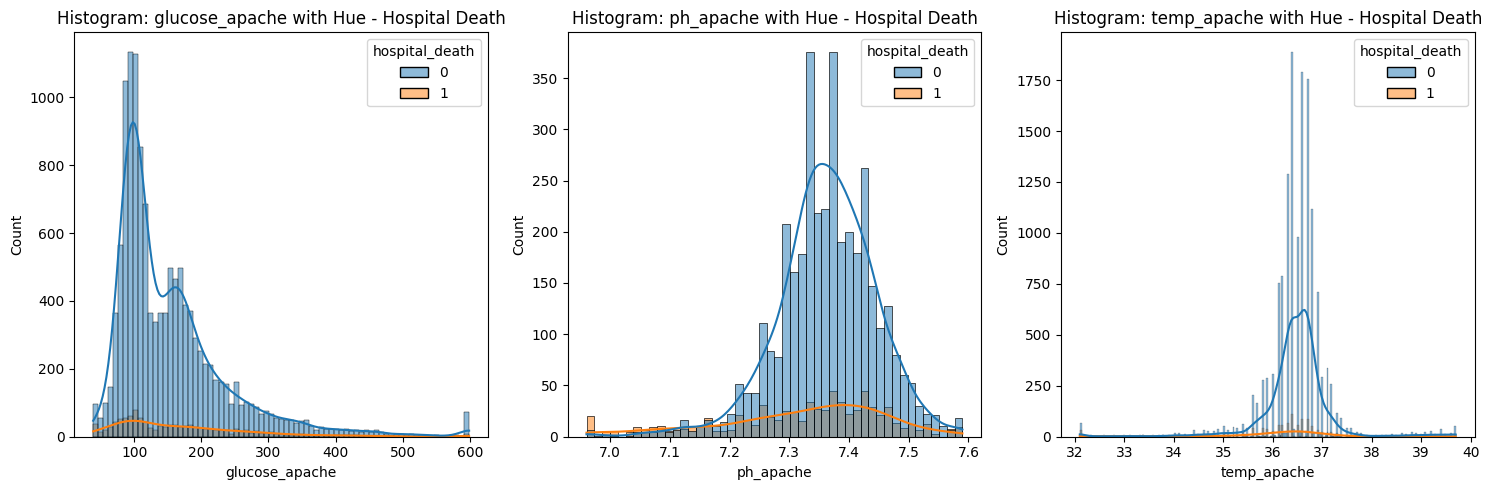

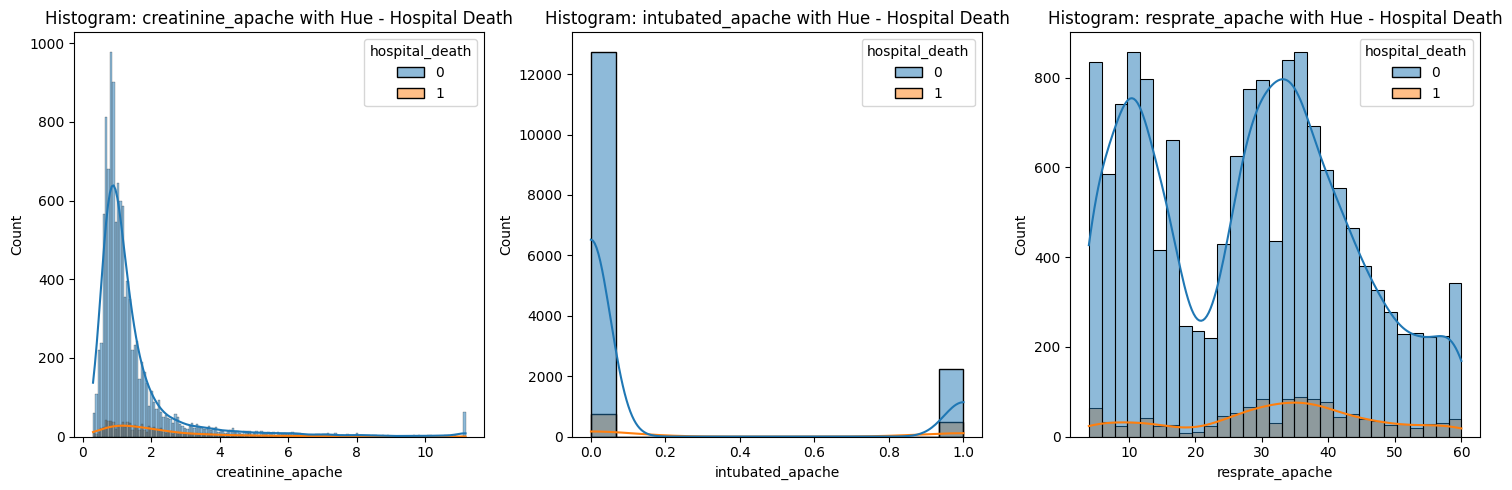

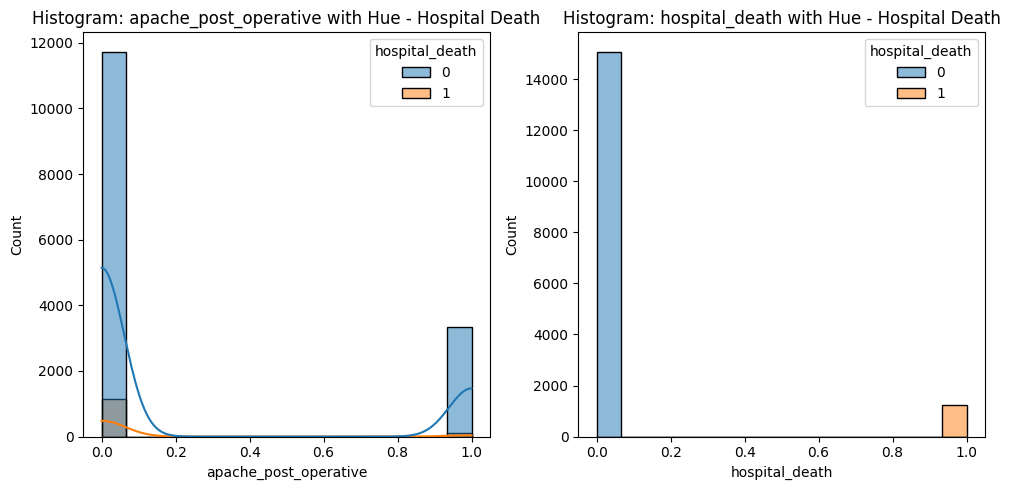

In [ ]:
# Get the regression columns from the DataFrame (excluding the target variable column)
regression_columns = category_df.columns[category_df.dtypes != 'object'].tolist()

num_columns = len(regression_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

# Create histograms for each regression column
for i, column in enumerate(regression_columns):
    if i % 3 == 0:
        plt.figure(figsize=(15, 5))  # Adjust the figure size if needed

    plt.subplot(1, 3, (i % 3) + 1)
    sns.histplot(data=category_df, x=column, hue=target_var, kde=True)
    plt.title(f'Histogram: {column} with Hue - Hospital Death')
    plt.xlabel(column)
    plt.ylabel('Count')

    if i % 3 == 2 or i == num_columns - 1:
        plt.tight_layout()  # Adjust the spacing between subplots
        plt.show()

In [ ]:
category = 'vitals'
category_df = vitals_df

In [ ]:
category_rows = dictionary['Category'] == category
category_columns = ['Variable Name', 'Description']
print(dictionary.loc[category_rows, category_columns])

                Variable Name  \
47     d1_diasbp_invasive_max   
48     d1_diasbp_invasive_min   
49              d1_diasbp_max   
50              d1_diasbp_min   
51  d1_diasbp_noninvasive_max   
52  d1_diasbp_noninvasive_min   
53           d1_heartrate_max   
54           d1_heartrate_min   
55        d1_mbp_invasive_max   
56        d1_mbp_invasive_min   
57                 d1_mbp_max   
58                 d1_mbp_min   
59     d1_mbp_noninvasive_max   
60     d1_mbp_noninvasive_min   
61            d1_resprate_max   
62            d1_resprate_min   
63                d1_spo2_max   
64                d1_spo2_min   
65      d1_sysbp_invasive_max   
66      d1_sysbp_invasive_min   
67               d1_sysbp_max   
68               d1_sysbp_min   
69   d1_sysbp_noninvasive_max   
70   d1_sysbp_noninvasive_min   
71                d1_temp_max   
72                d1_temp_min   
73     h1_diasbp_invasive_max   
74     h1_diasbp_invasive_min   
75              h1_diasbp_max   
76        

In [ ]:
# Count the number of classification columns
classification_columns = category_df.select_dtypes(include='object').columns
num_classification_columns = len(classification_columns)

# Count the number of regression columns
regression_columns = category_df.select_dtypes(exclude='object').columns
num_regression_columns = len(regression_columns)

print("Number of Classification Columns:", num_classification_columns)
print("Number of Regression Columns:", num_regression_columns)

Number of Classification Columns: 0
Number of Regression Columns: 53


In [ ]:
category_df.isna().sum()

h1_spo2_min                    546
d1_sysbp_min                    17
d1_mbp_max                      55
d1_diasbp_invasive_max       11694
h1_spo2_max                    546
d1_sysbp_invasive_max        11691
d1_diasbp_noninvasive_min      210
h1_diasbp_noninvasive_max     1251
d1_heartrate_min                14
d1_diasbp_max                   22
d1_mbp_min                      55
h1_mbp_invasive_max          12956
h1_mbp_noninvasive_min        2394
h1_mbp_invasive_min          12956
h1_diasbp_invasive_min       13026
d1_diasbp_invasive_min       11694
d1_mbp_invasive_max          11577
h1_diasbp_min                  533
h1_heartrate_min               407
d1_mbp_noninvasive_max         523
d1_sysbp_invasive_min        11691
h1_sysbp_noninvasive_min      1244
h1_mbp_max                    1134
d1_temp_max                    170
d1_resprate_min                 41
d1_sysbp_noninvasive_min       203
h1_mbp_noninvasive_max        2394
h1_sysbp_noninvasive_max      1244
h1_diasbp_max       

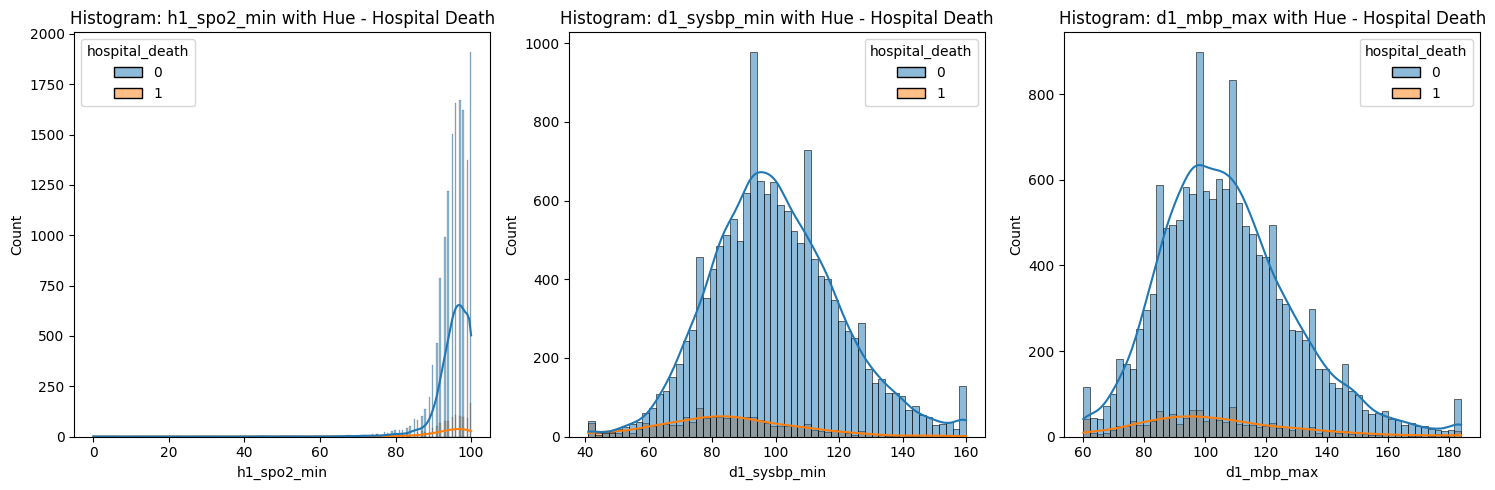

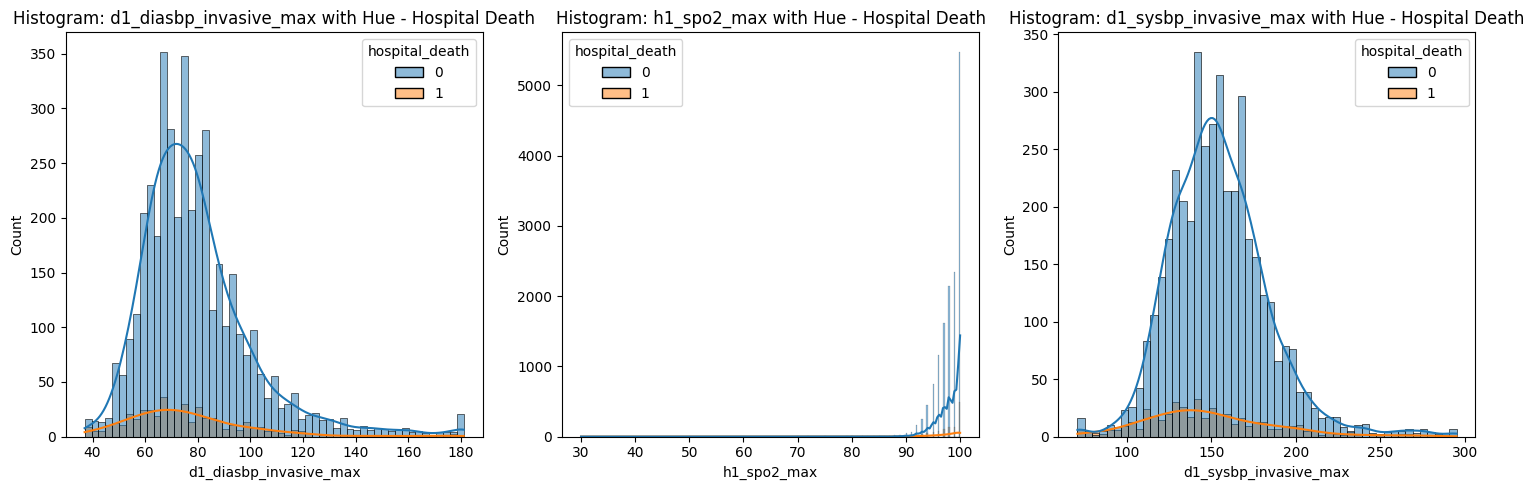

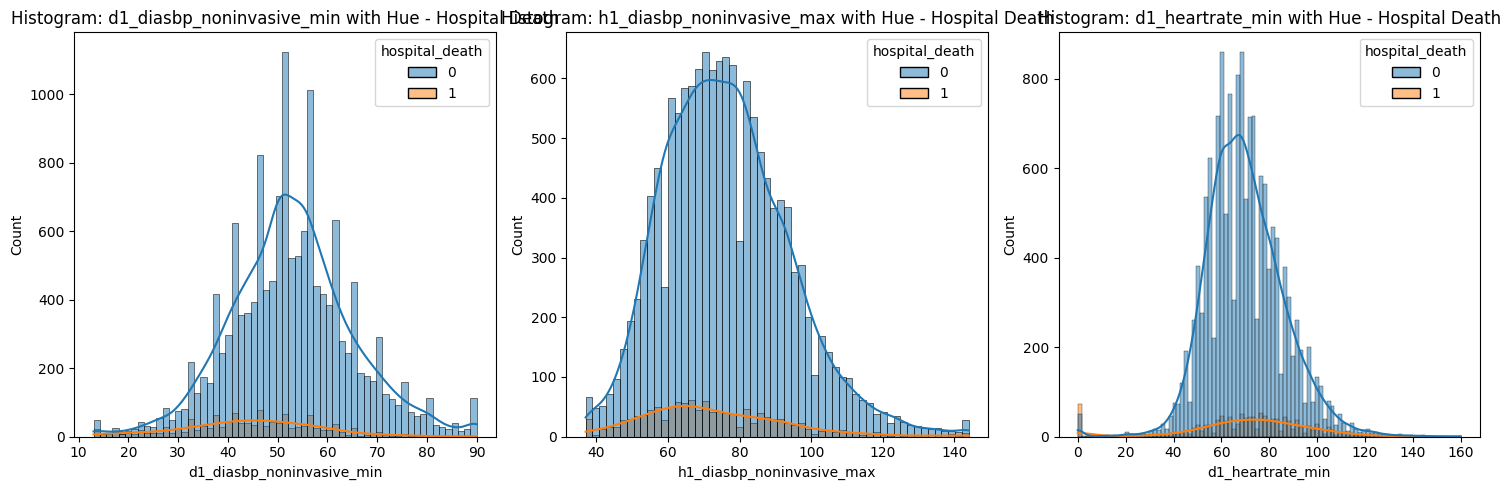

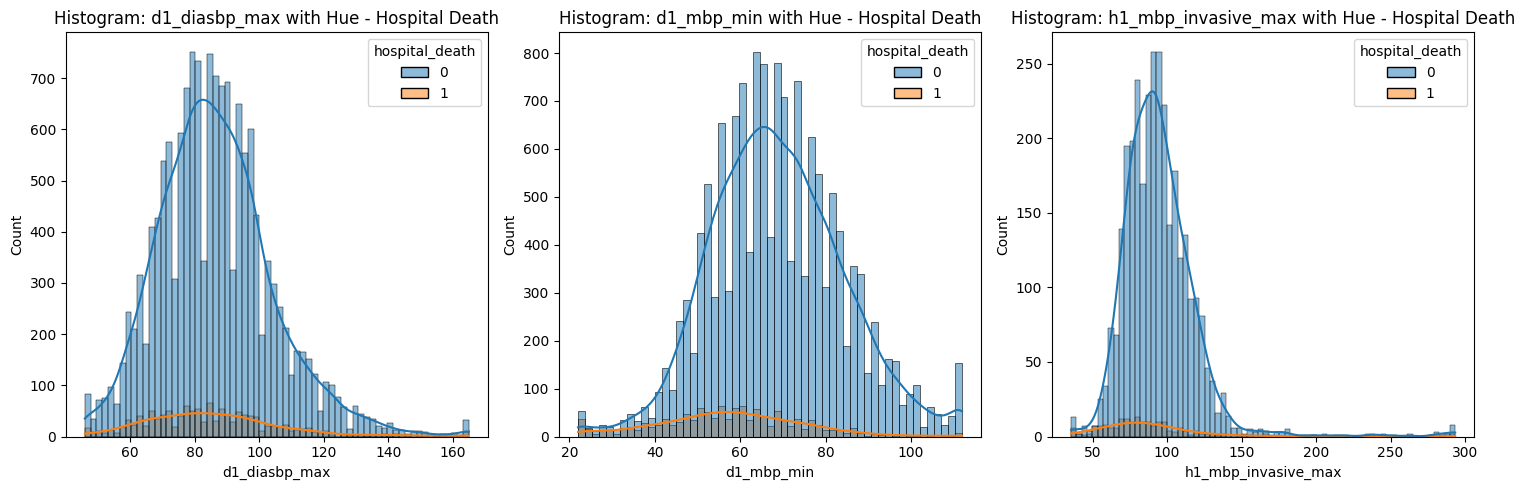

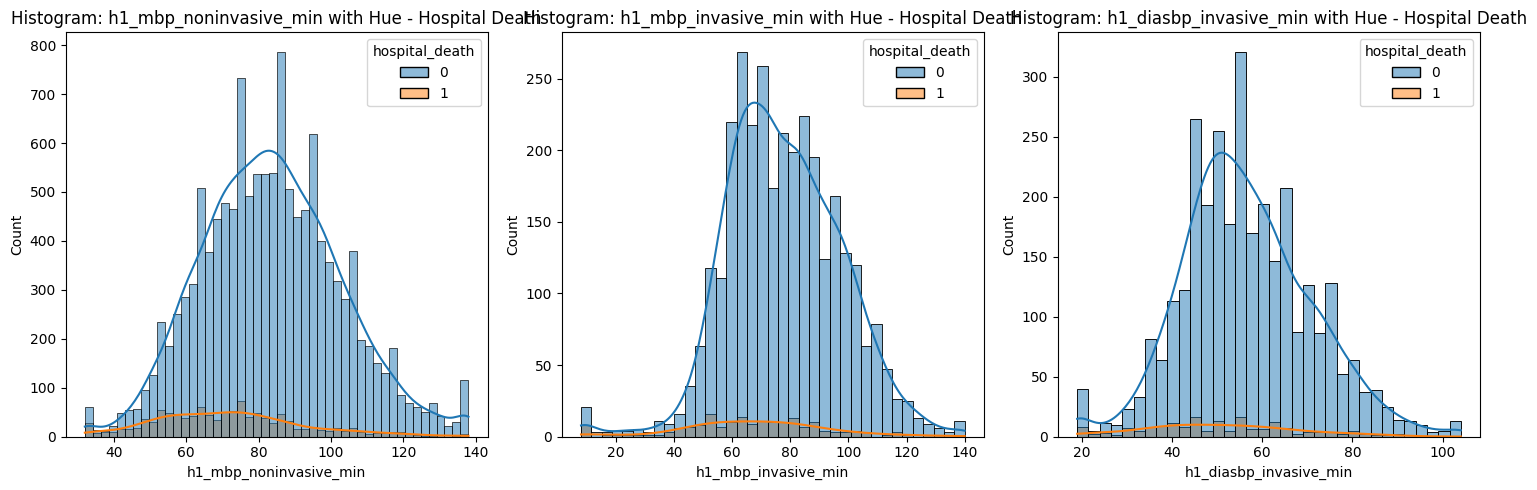

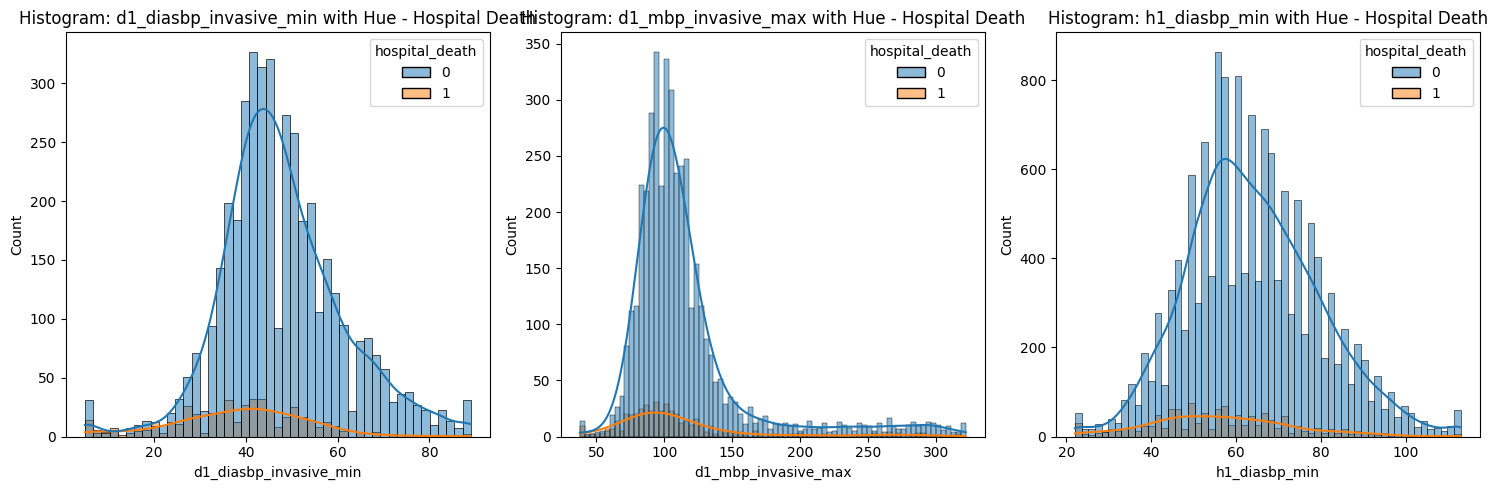

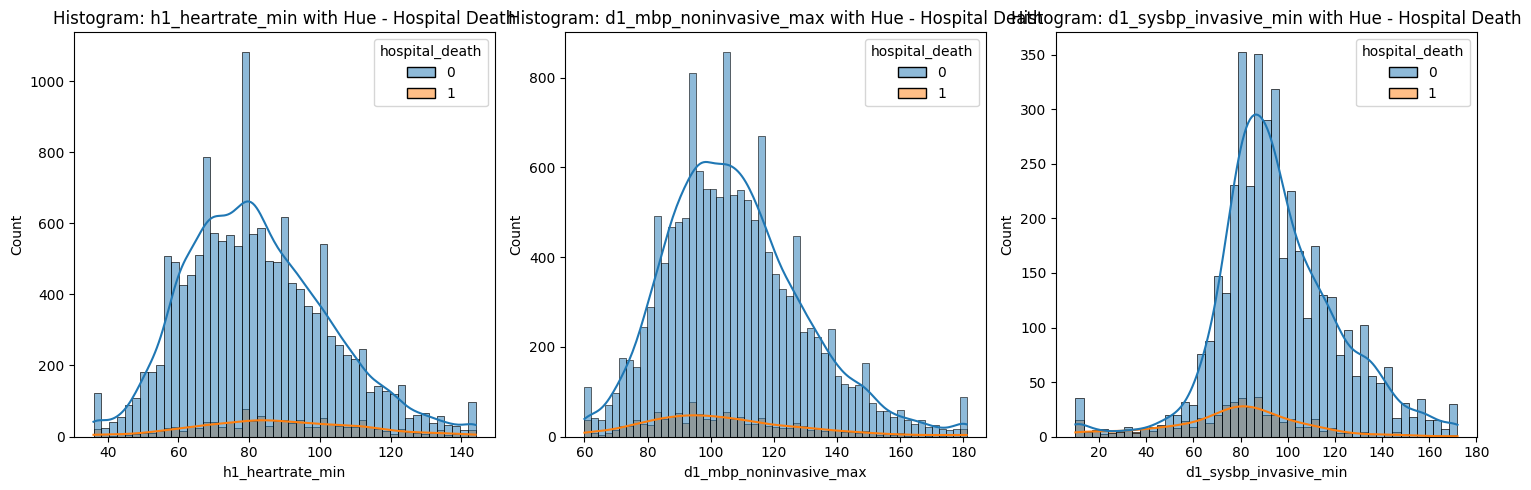

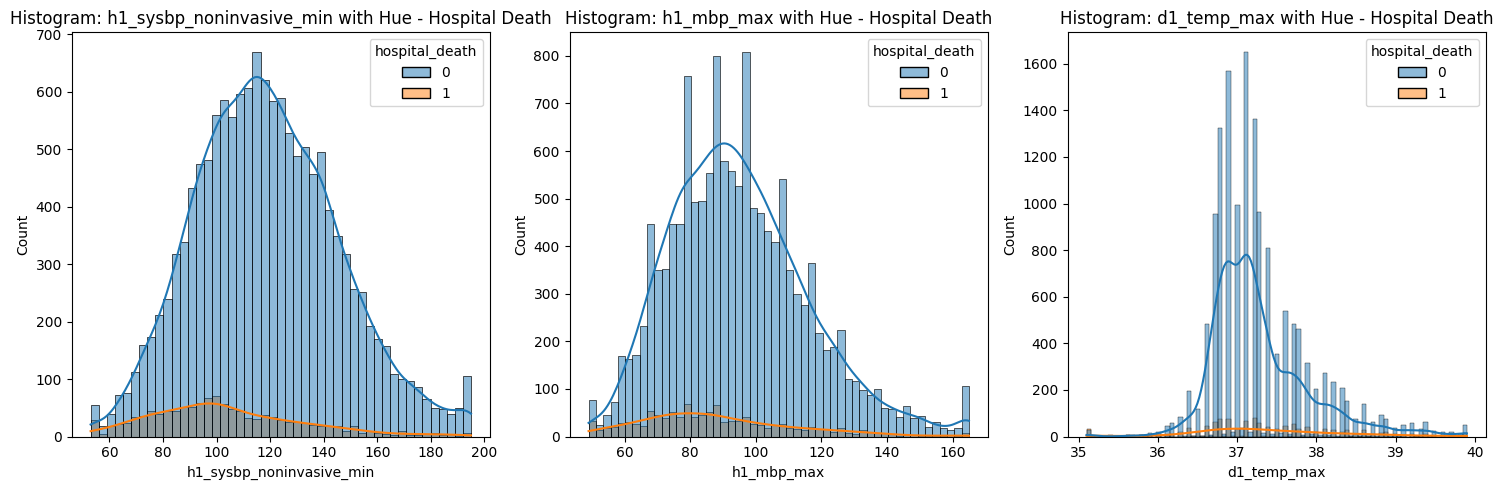

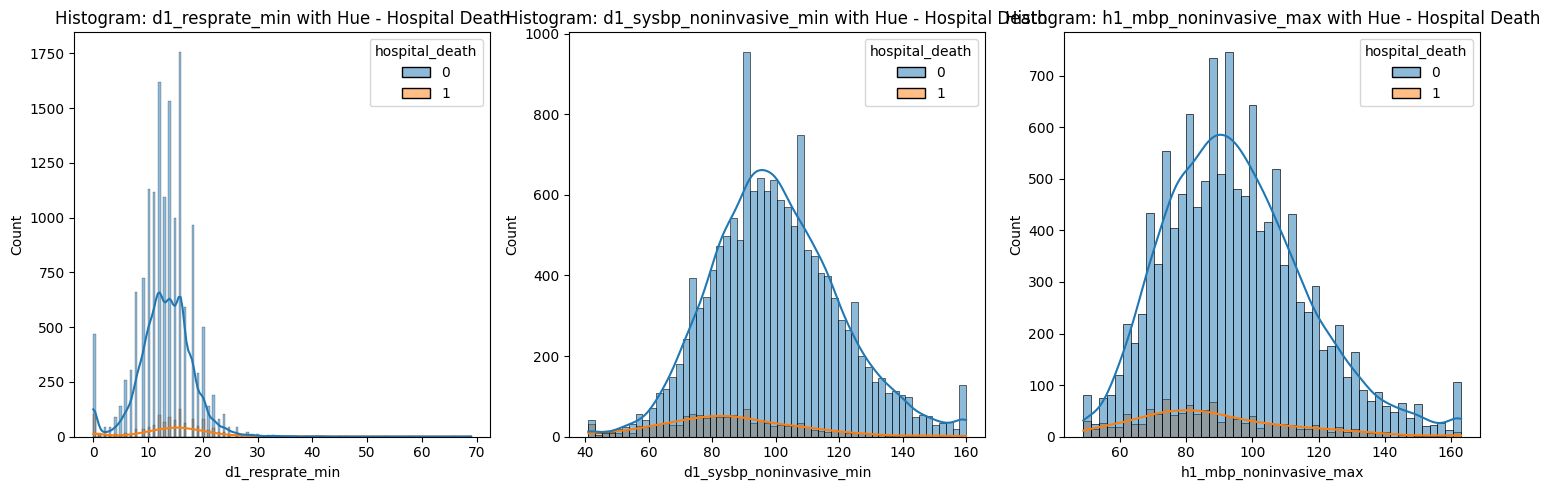

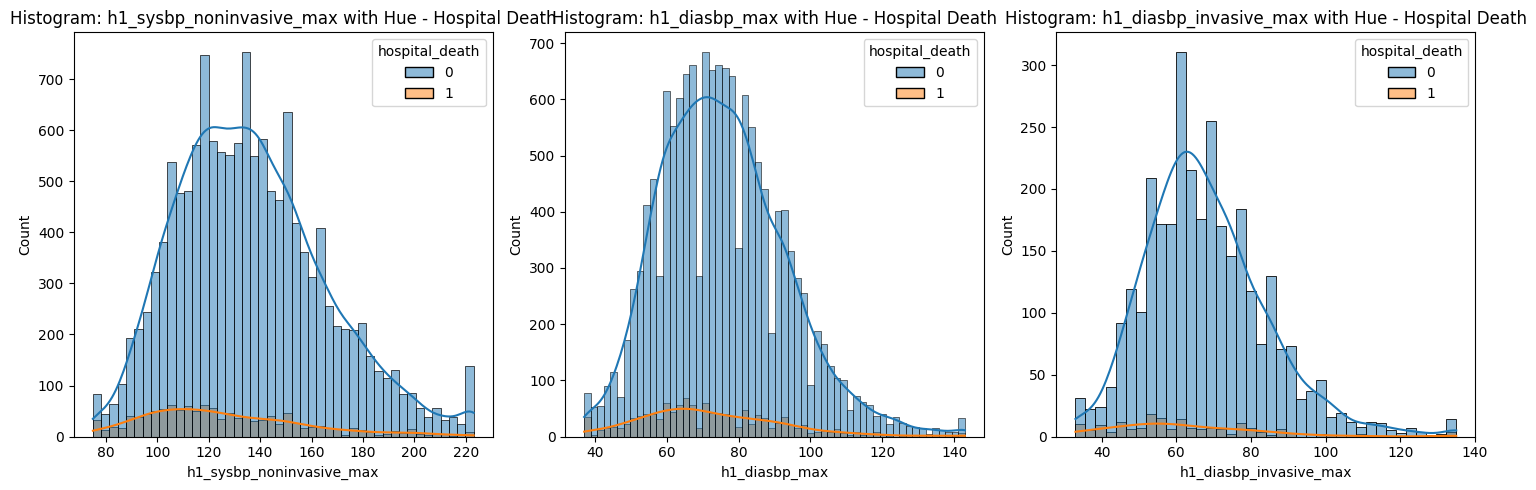

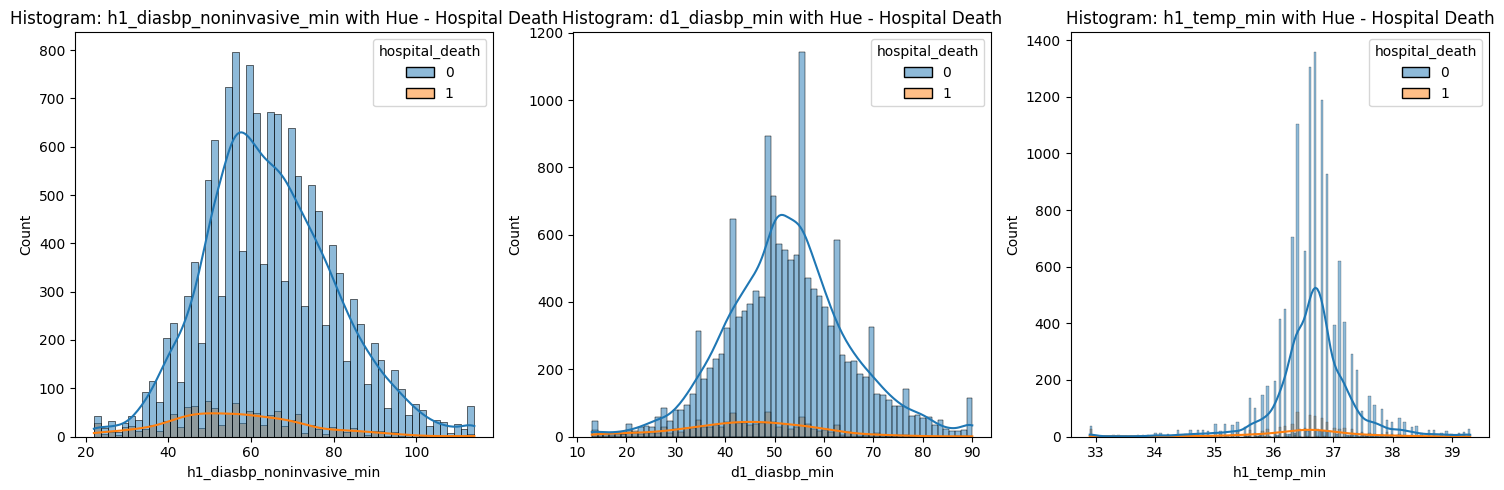

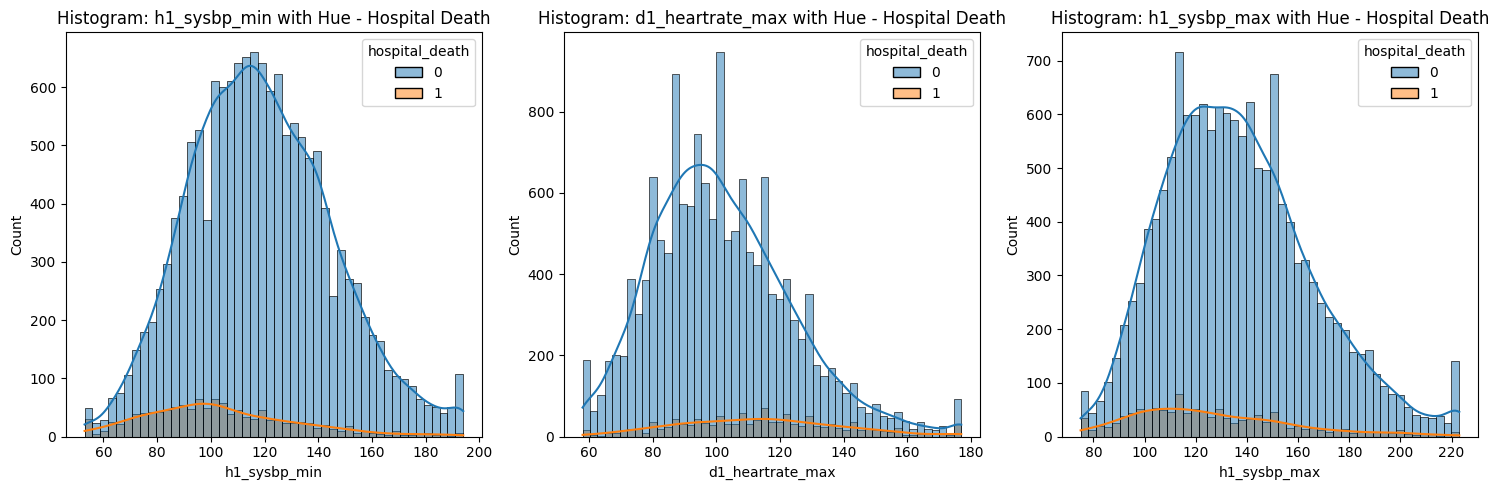

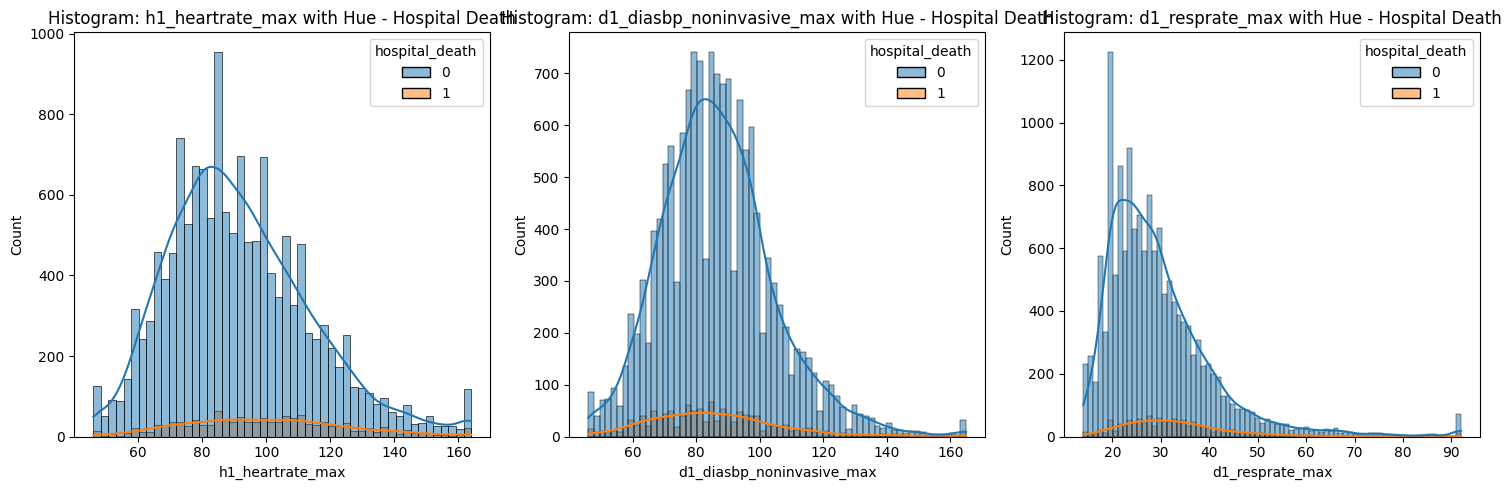

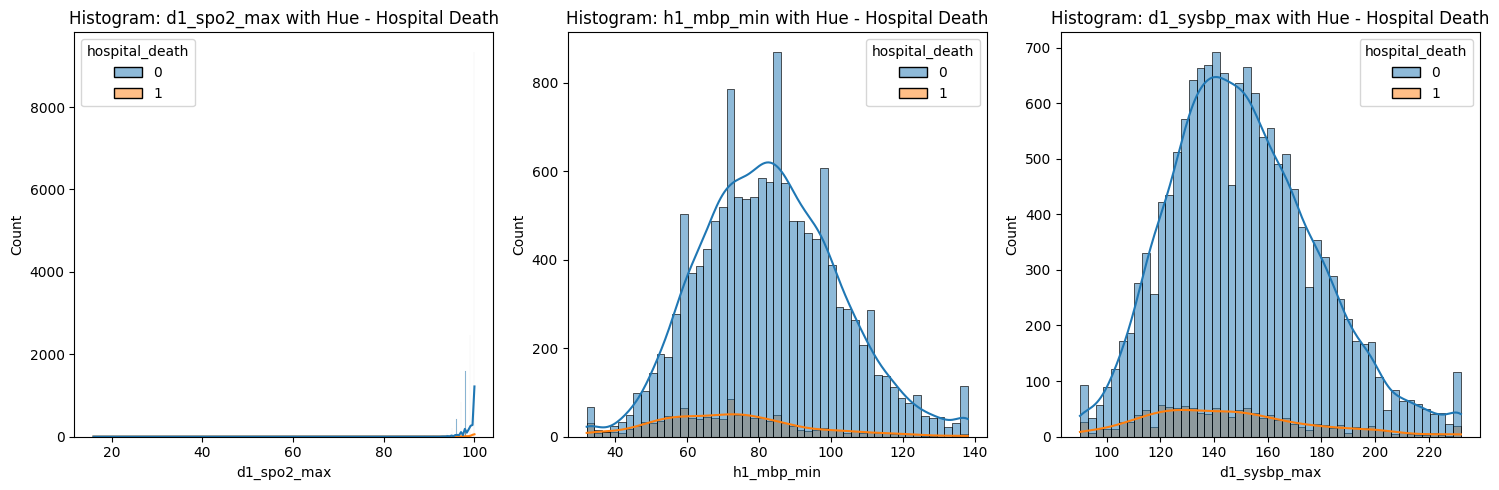

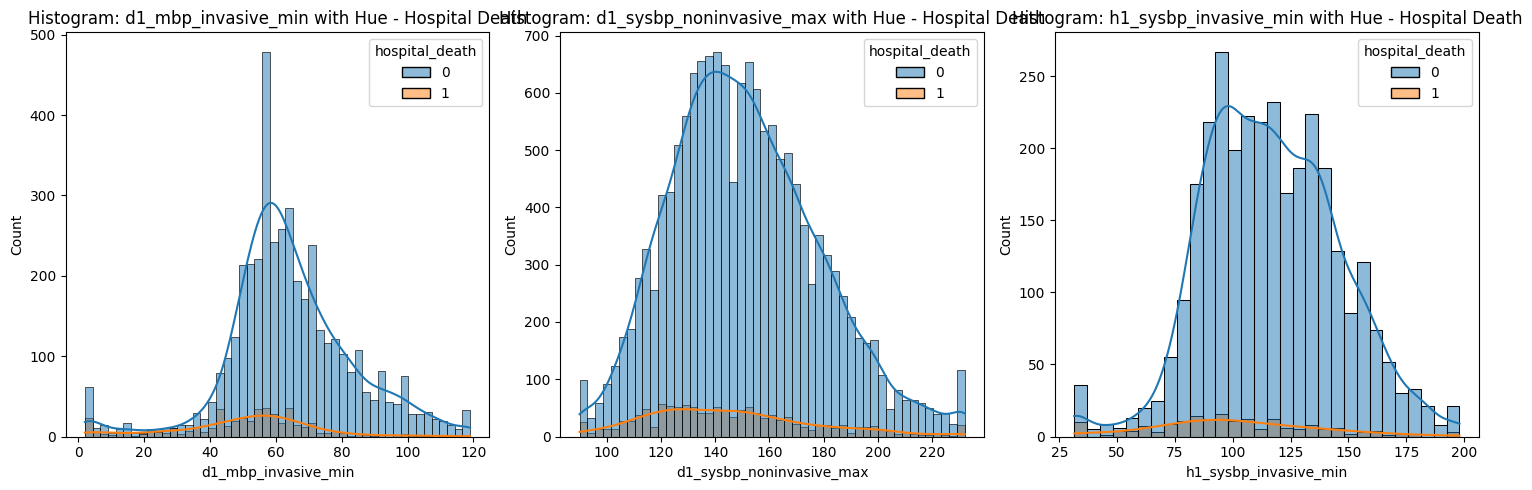

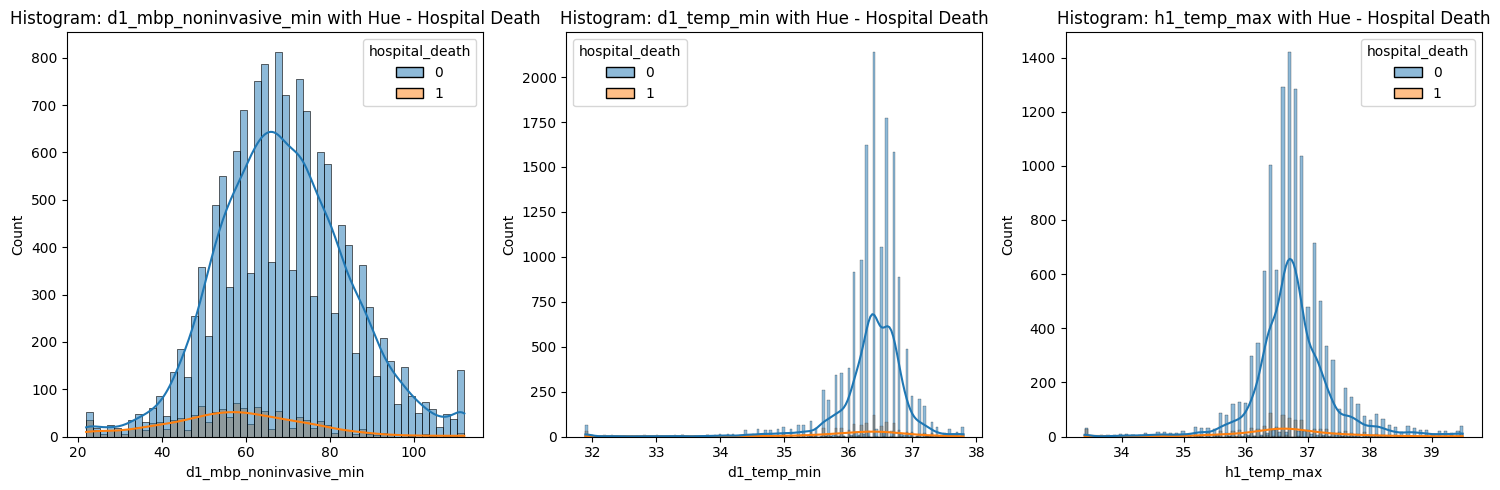

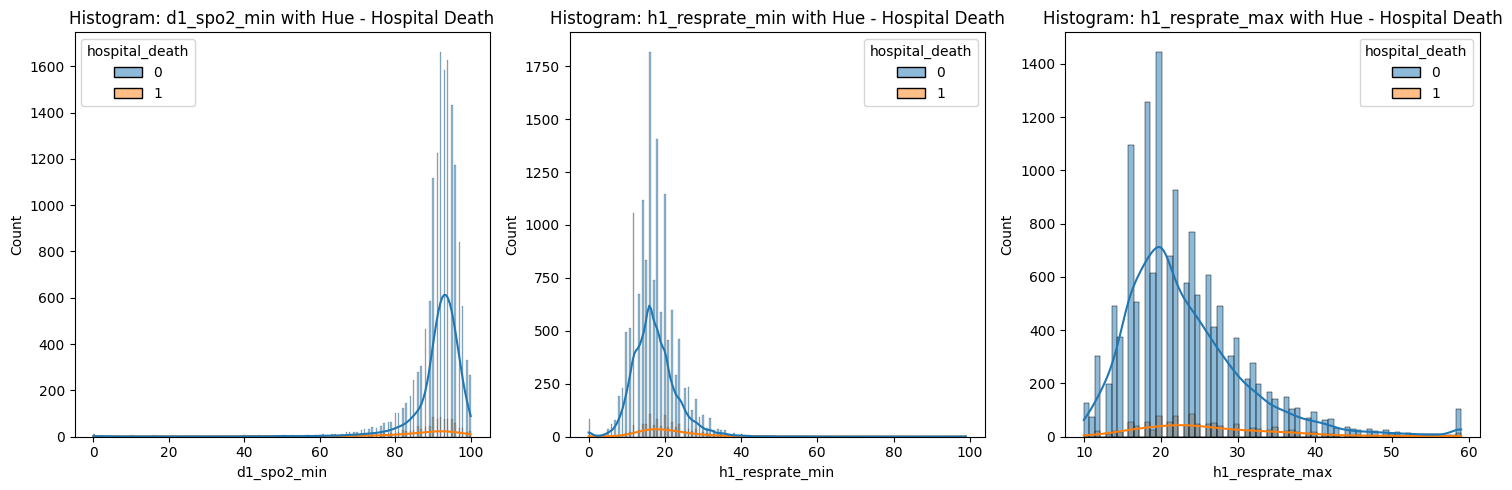

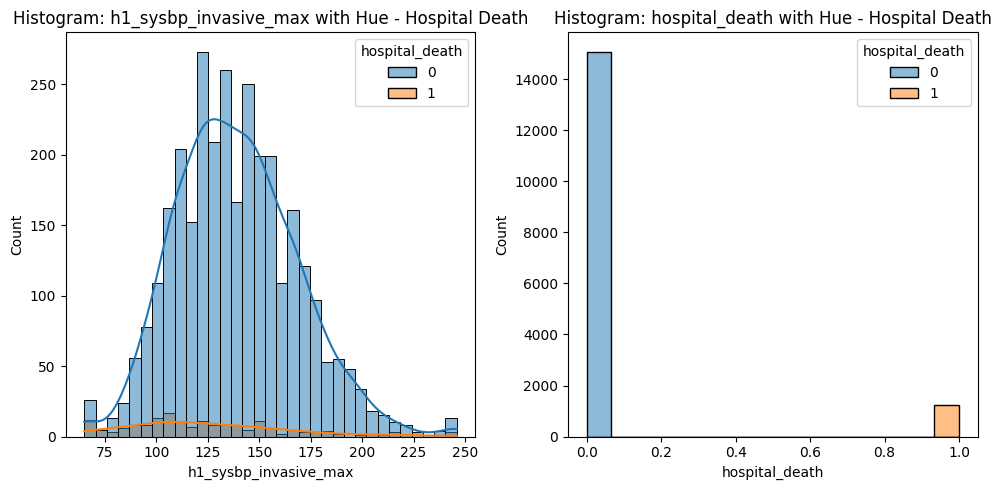

In [ ]:
# Get the regression columns from the DataFrame (excluding the target variable column)
regression_columns = category_df.columns[category_df.dtypes != 'object'].tolist()

num_columns = len(regression_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

# Create histograms for each regression column
for i, column in enumerate(regression_columns):
    if i % 3 == 0:
        plt.figure(figsize=(15, 5))  # Adjust the figure size if needed

    plt.subplot(1, 3, (i % 3) + 1)
    sns.histplot(data=category_df, x=column, hue=target_var, kde=True)
    plt.title(f'Histogram: {column} with Hue - Hospital Death')
    plt.xlabel(column)
    plt.ylabel('Count')

    if i % 3 == 2 or i == num_columns - 1:
        plt.tight_layout()  # Adjust the spacing between subplots
        plt.show()

In [ ]:
category = 'labs'
category_df = labs_df

In [ ]:
category_rows = dictionary['Category'] == category
category_columns = ['Variable Name', 'Description']
print(dictionary.loc[category_rows, category_columns])

         Variable Name                                        Description
99      d1_albumin_max  The lowest albumin concentration of the patien...
100     d1_albumin_min  The lowest albumin concentration of the patien...
101   d1_bilirubin_max  The highest bilirubin concentration of the pat...
102   d1_bilirubin_min  The lowest bilirubin concentration of the pati...
103         d1_bun_max  The highest blood urea nitrogen concentration ...
104         d1_bun_min  The lowest blood urea nitrogen concentration o...
105     d1_calcium_max  The highest calcium concentration of the patie...
106     d1_calcium_min  The lowest calcium concentration of the patien...
107  d1_creatinine_max  The highest creatinine concentration of the pa...
108  d1_creatinine_min  The lowest creatinine concentration of the pat...
109     d1_glucose_max  The highest glucose concentration of the patie...
110     d1_glucose_min  The lowest glucose concentration of the patien...
111        d1_hco3_max  The highest bi

In [ ]:
# Count the number of classification columns
classification_columns = category_df.select_dtypes(include='object').columns
num_classification_columns = len(classification_columns)

# Count the number of regression columns
regression_columns = category_df.select_dtypes(exclude='object').columns
num_regression_columns = len(regression_columns)

print("Number of Classification Columns:", num_classification_columns)
print("Number of Regression Columns:", num_regression_columns)

Number of Classification Columns: 0
Number of Regression Columns: 61


In [ ]:
category_df.isna().sum()

d1_bun_min            3206
h1_calcium_max       14254
h1_albumin_min       15073
d1_sodium_max         3130
d1_bun_max            3206
d1_hemaglobin_max     3238
d1_inr_max           11341
d1_wbc_max            3249
d1_hco3_max           3662
h1_hco3_min          14132
h1_inr_max           11341
h1_albumin_max       15073
d1_hematocrit_max     2691
h1_lactate_max       15558
h1_hemaglobin_min    13291
d1_platelets_max      3636
d1_calcium_min        3787
h1_lactate_min       15558
d1_glucose_max        1517
d1_glucose_min        1517
h1_creatinine_max    13884
d1_creatinine_max     2849
h1_platelets_max     13701
d1_hemaglobin_min     3238
d1_bilirubin_max     10576
d1_calcium_max        3787
h1_calcium_min       14254
h1_platelets_min     13701
h1_bun_max           13904
d1_potassium_max      2681
h1_wbc_max           13486
h1_glucose_max        9485
h1_wbc_min           13486
d1_hco3_min           3662
h1_potassium_max     13459
h1_creatinine_min    13884
h1_bun_min           13904
d

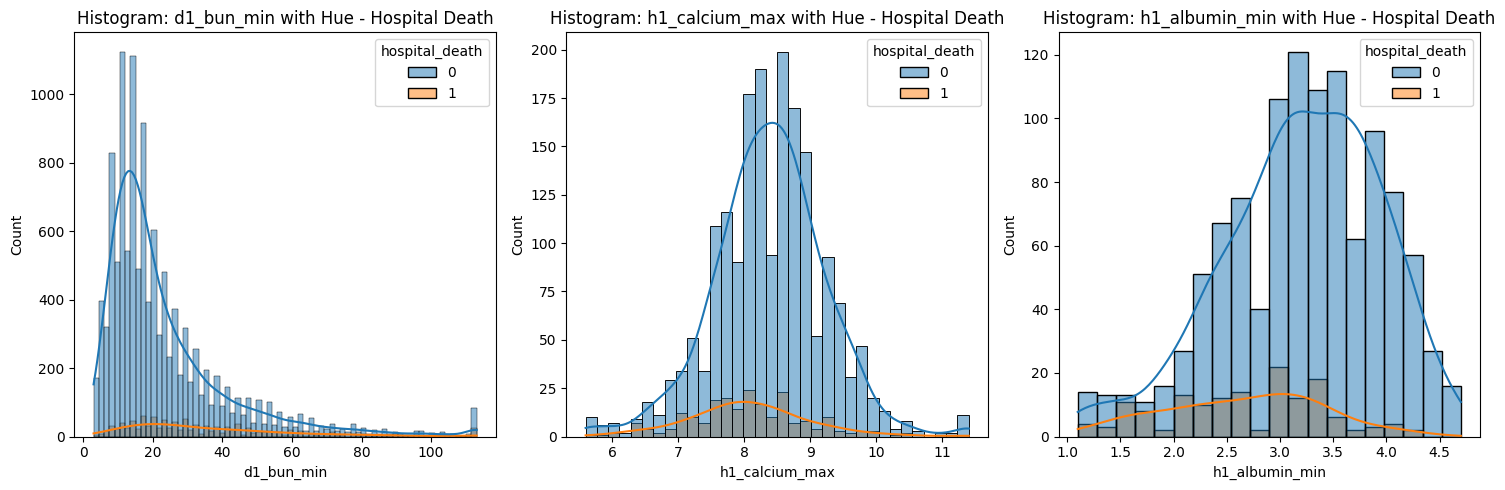

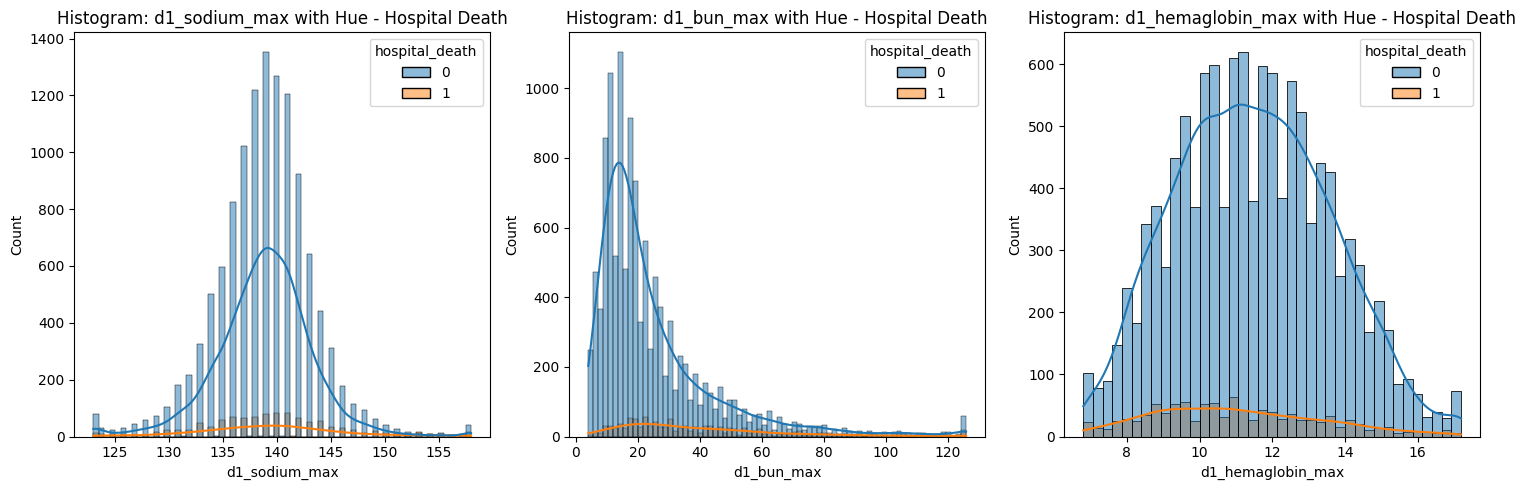

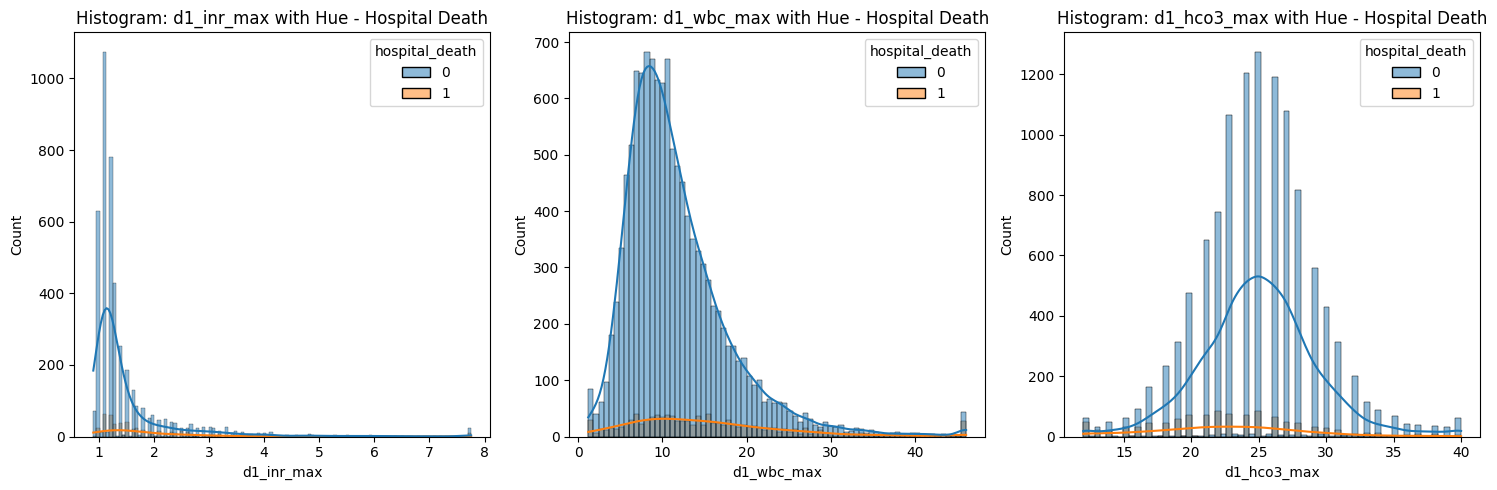

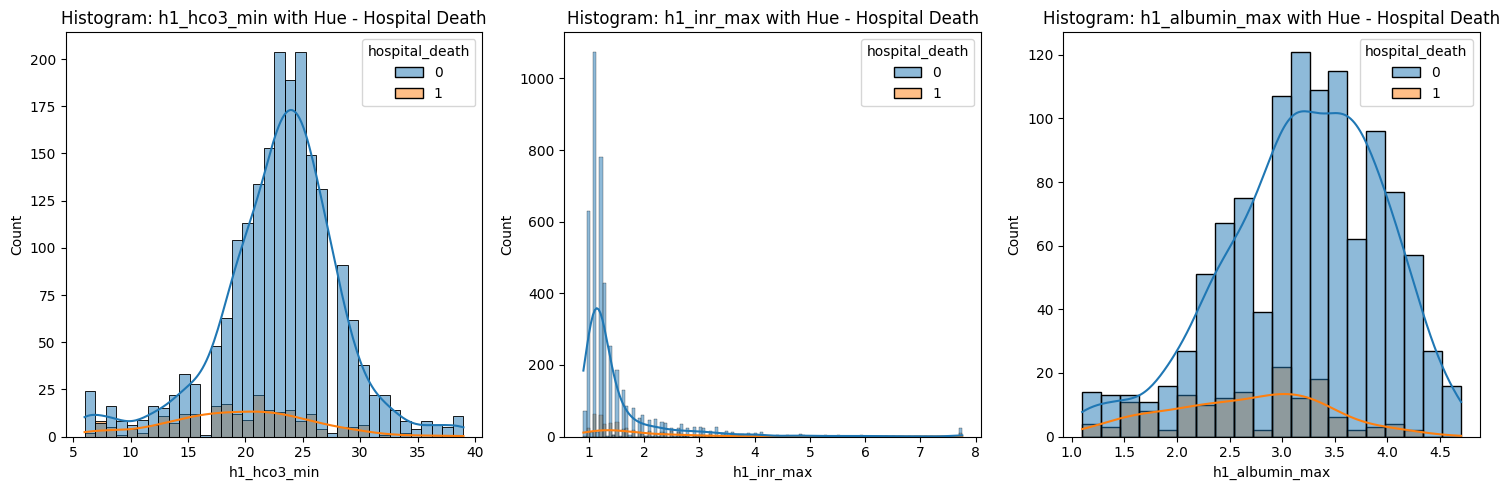

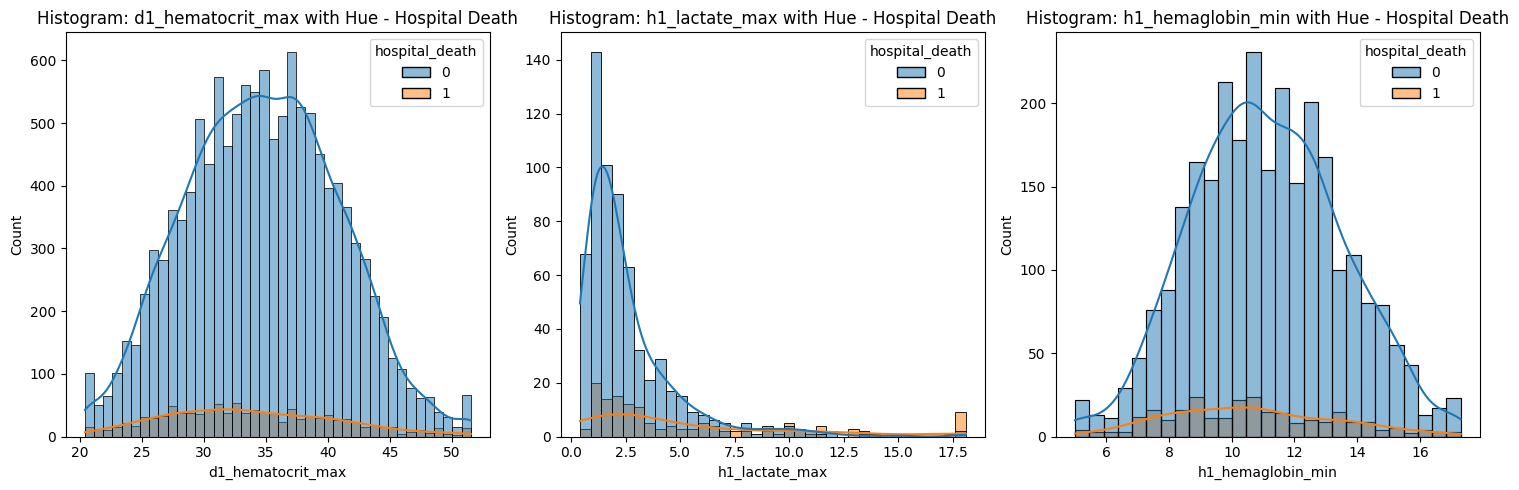

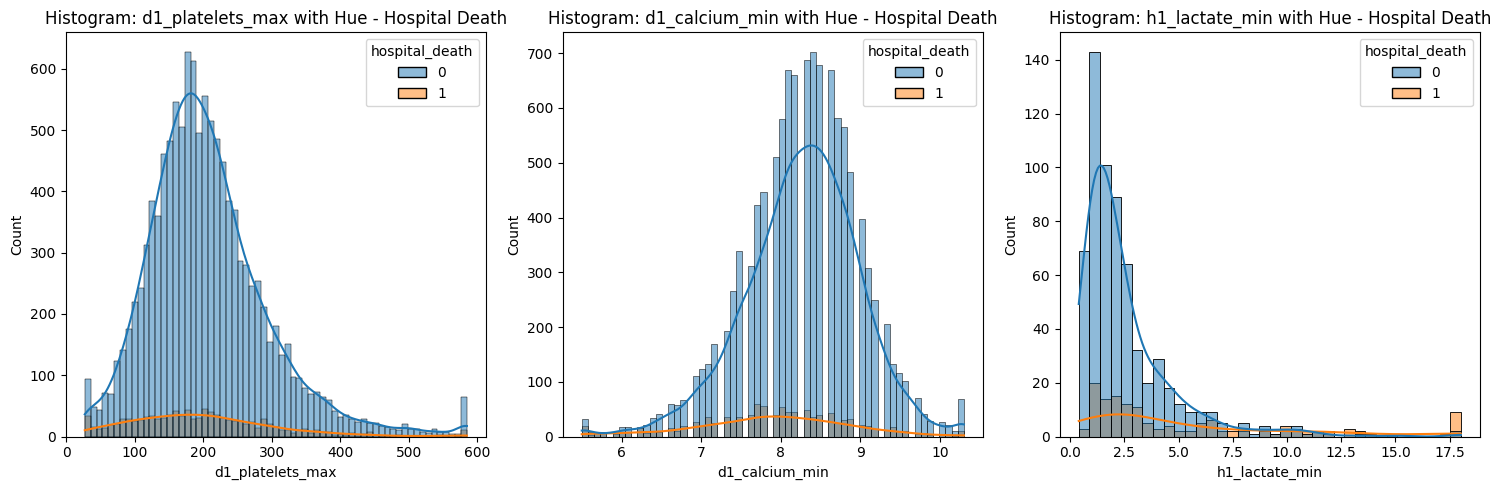

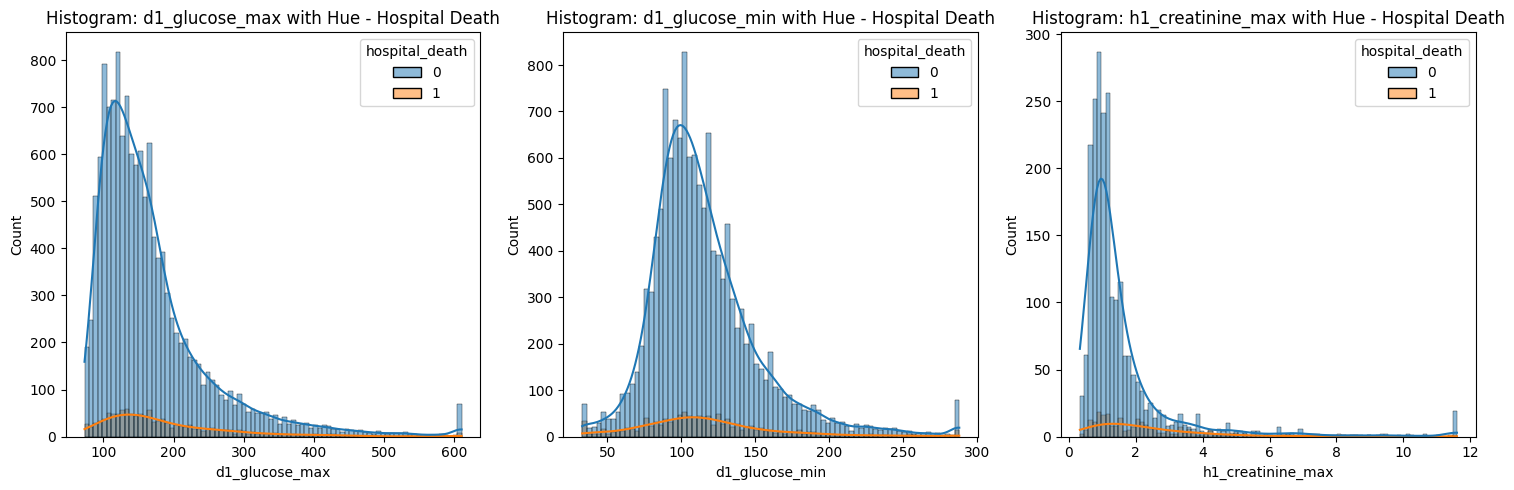

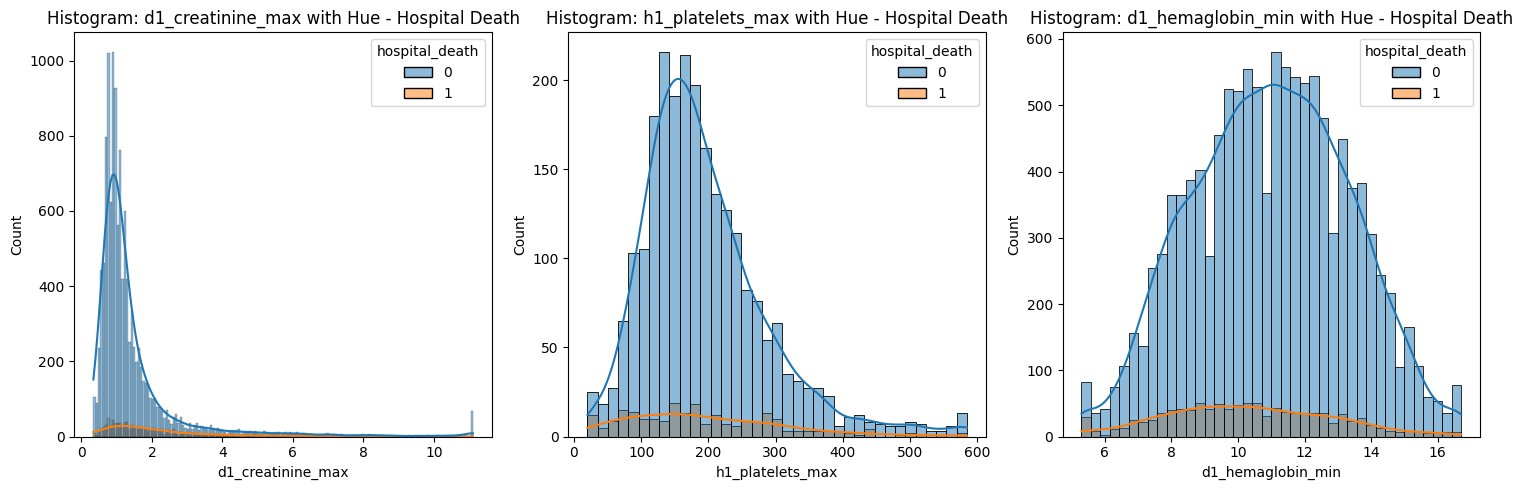

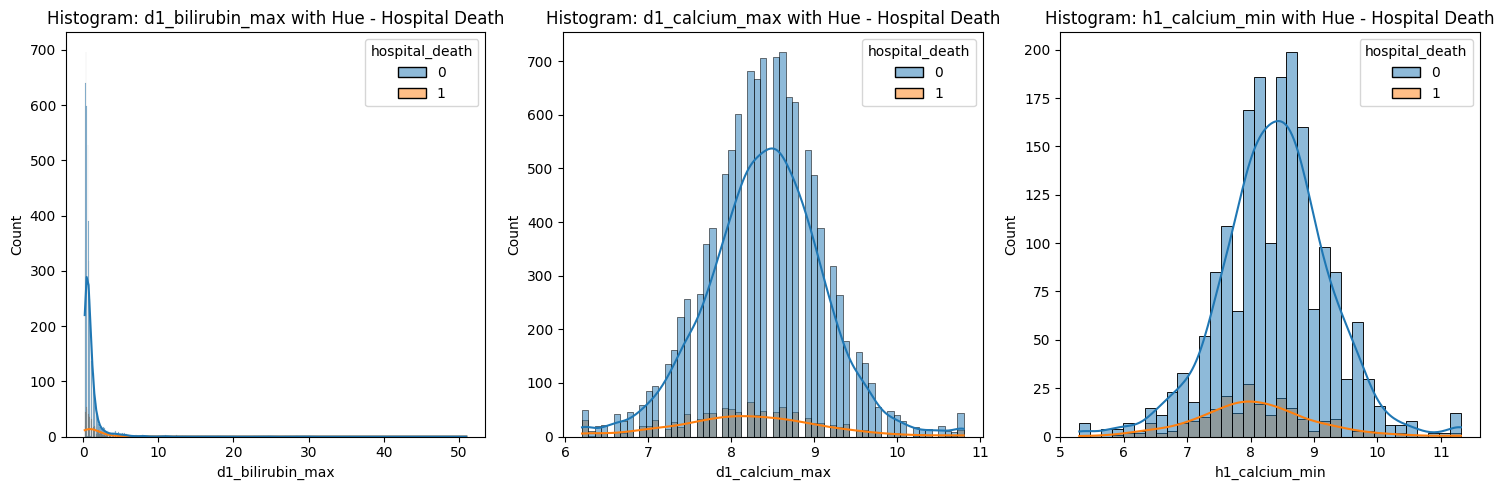

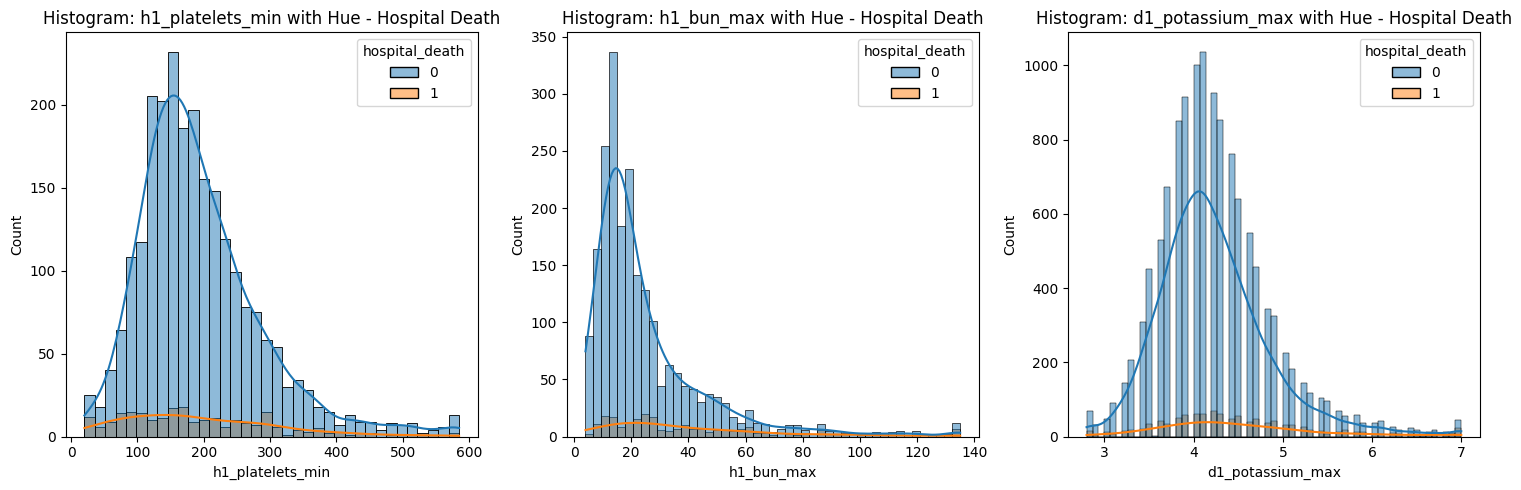

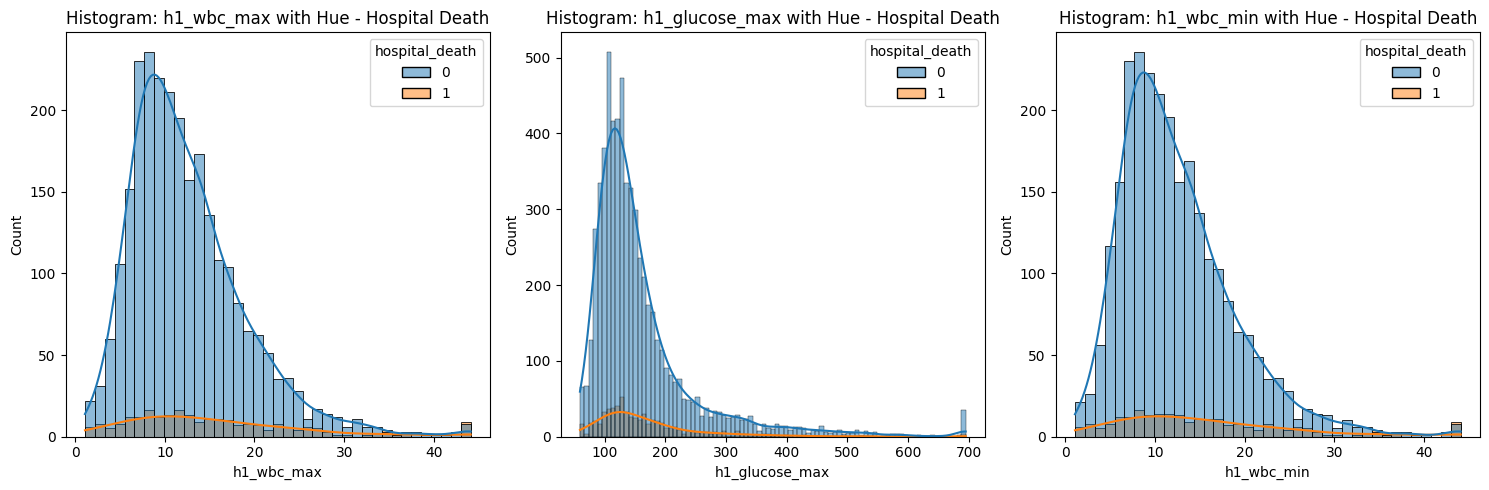

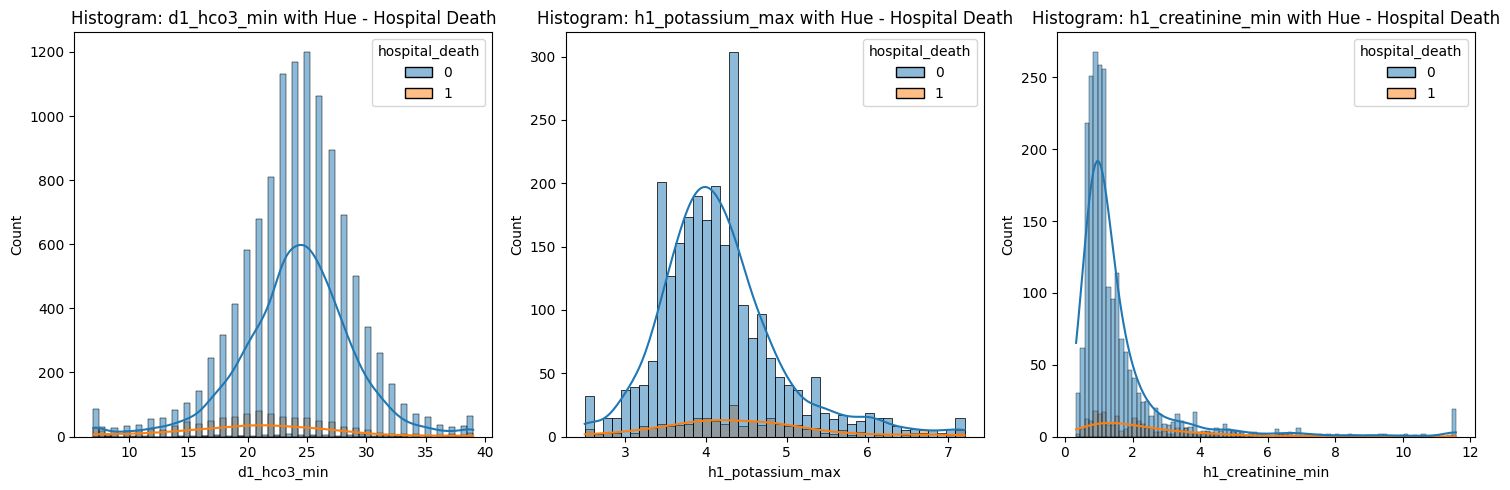

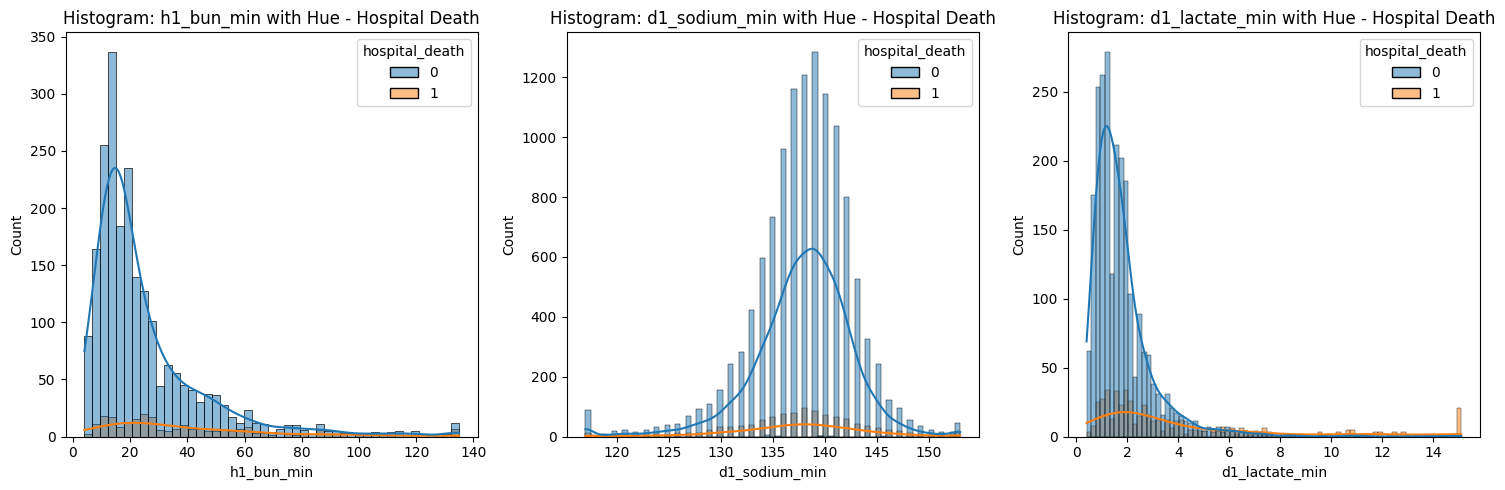

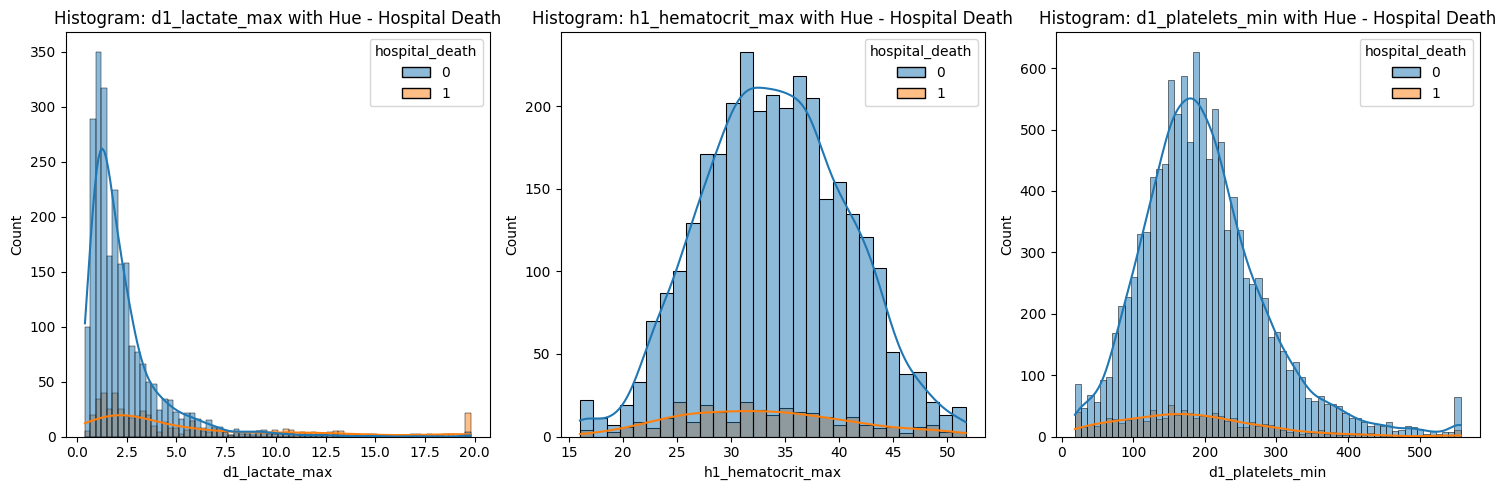

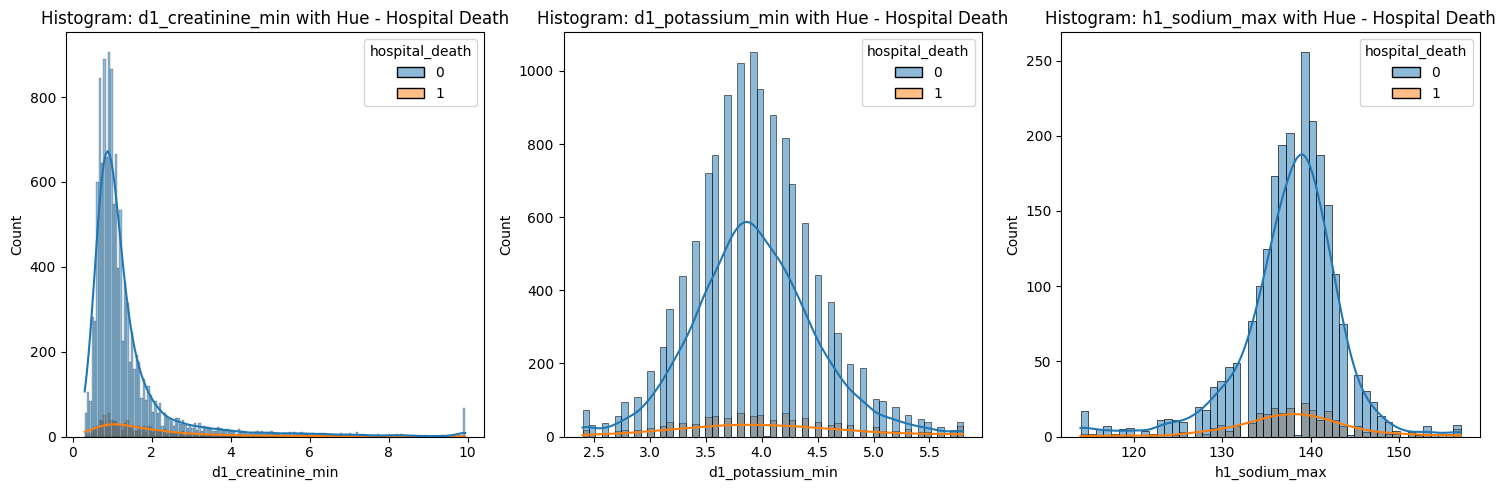

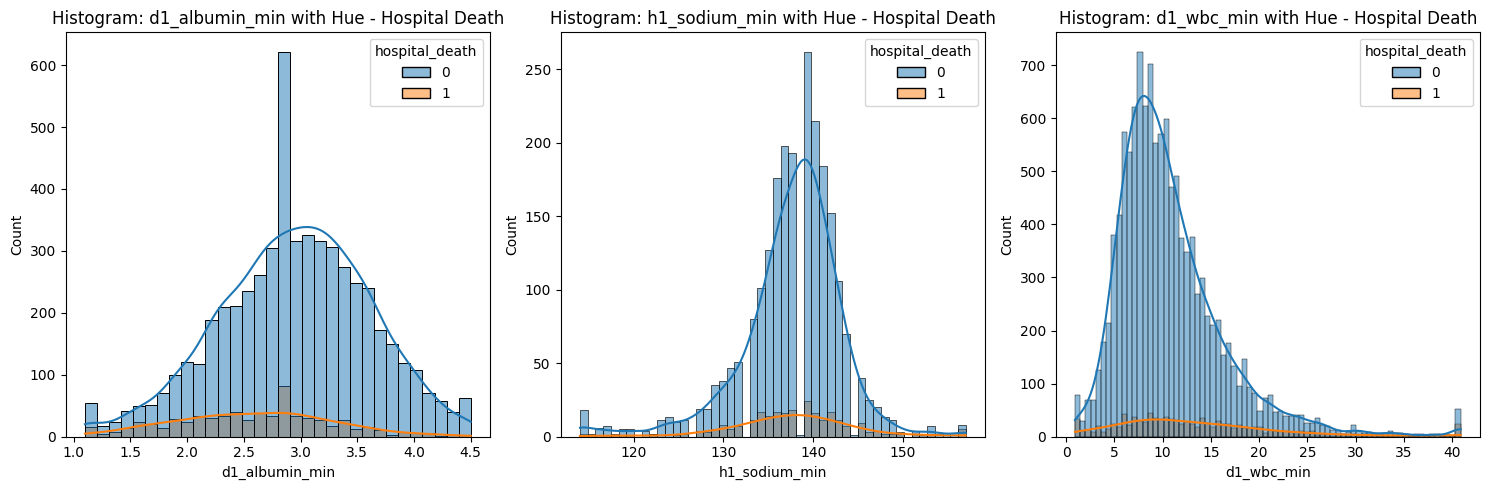

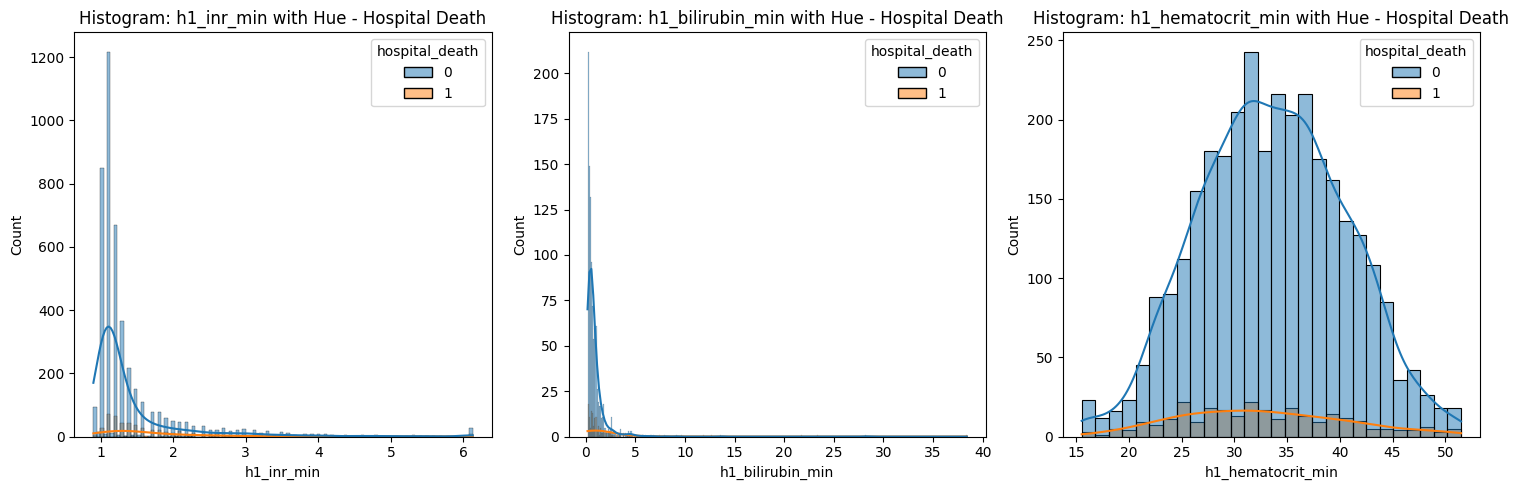

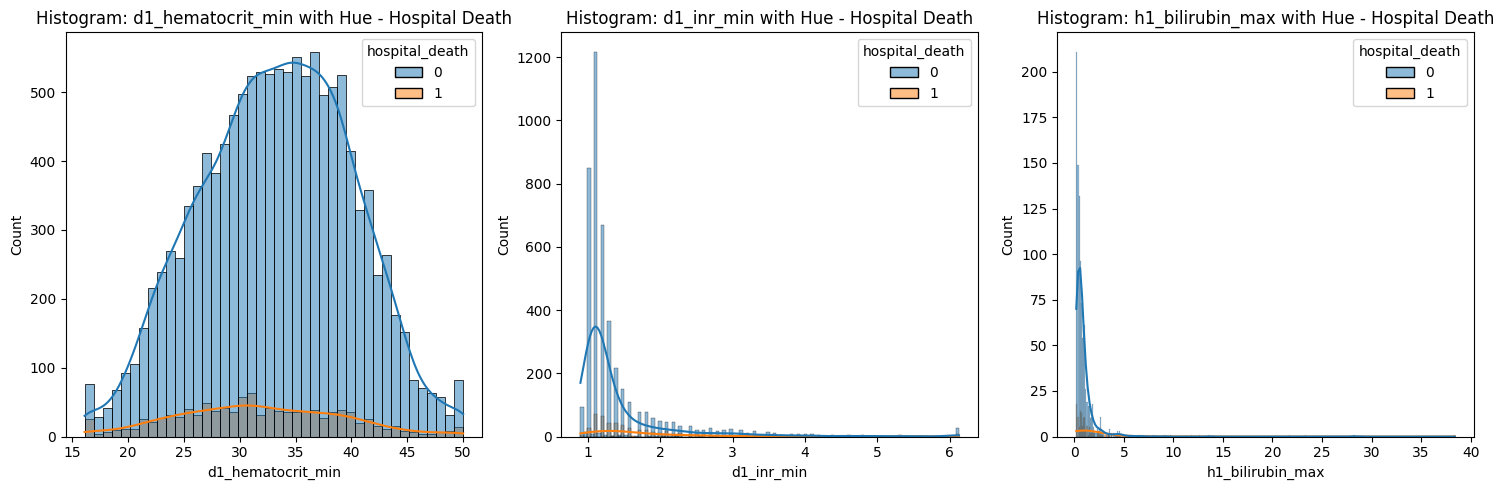

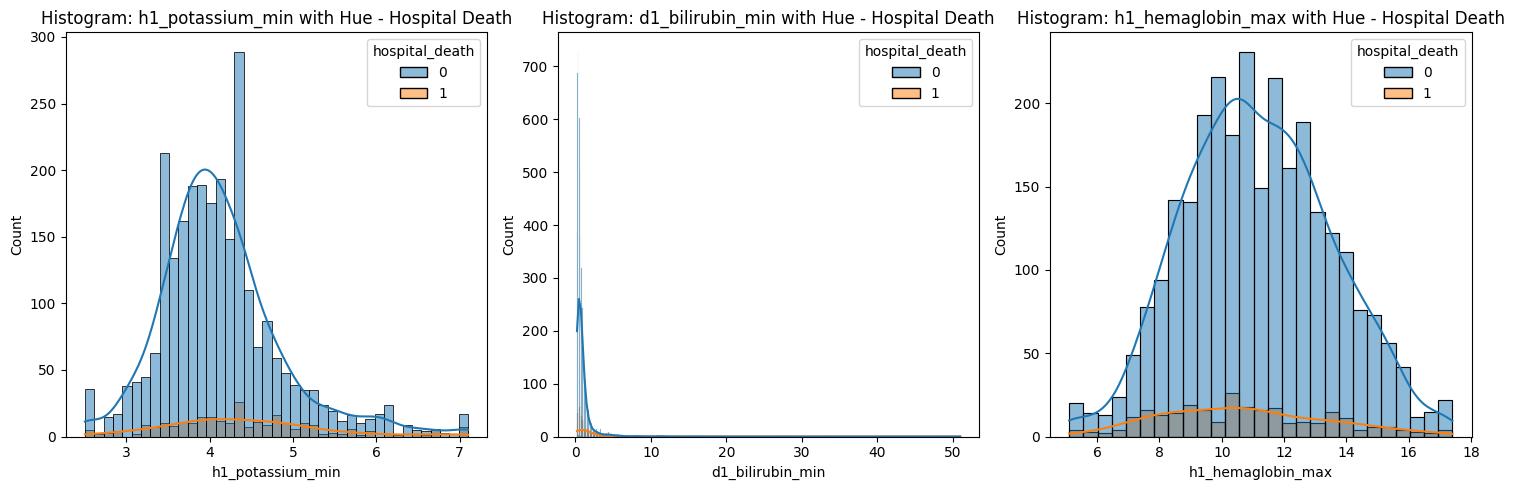

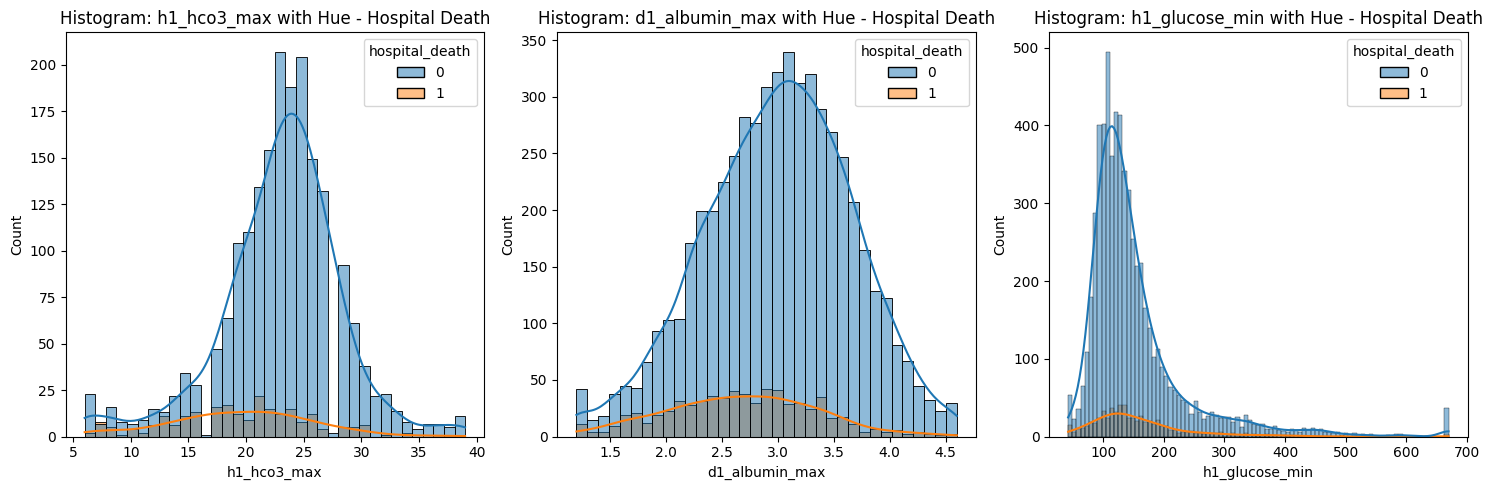

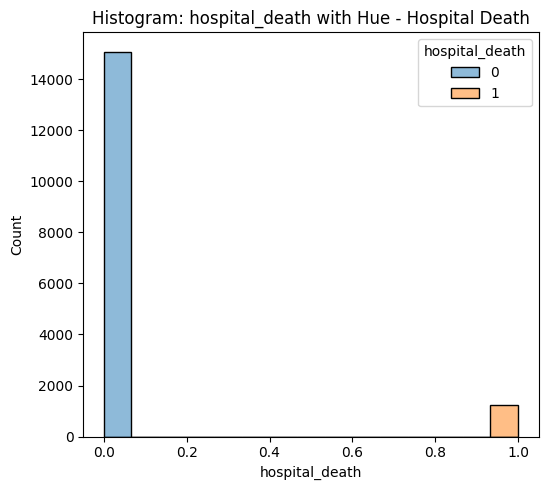

In [ ]:
# Get the regression columns from the DataFrame (excluding the target variable column)
regression_columns = category_df.columns[category_df.dtypes != 'object'].tolist()

num_columns = len(regression_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

# Create histograms for each regression column
for i, column in enumerate(regression_columns):
    if i % 3 == 0:
        plt.figure(figsize=(15, 5))  # Adjust the figure size if needed

    plt.subplot(1, 3, (i % 3) + 1)
    sns.histplot(data=category_df, x=column, hue=target_var, kde=True)
    plt.title(f'Histogram: {column} with Hue - Hospital Death')
    plt.xlabel(column)
    plt.ylabel('Count')

    if i % 3 == 2 or i == num_columns - 1:
        plt.tight_layout()  # Adjust the spacing between subplots
        plt.show()

In [ ]:
category = 'labs blood gas'
category_df = labs_blood_gas_df

In [ ]:
category_rows = dictionary['Category'] == category
category_columns = ['Variable Name', 'Description']
print(dictionary.loc[category_rows, category_columns])

            Variable Name                                        Description
159  d1_arterial_pco2_max  The highest arterial partial pressure of carbo...
160  d1_arterial_pco2_min  The lowest arterial partial pressure of carbon...
161    d1_arterial_ph_max  The highest arterial pH for the patient during...
162    d1_arterial_ph_min  The lowest arterial pH for the patient during ...
163   d1_arterial_po2_max  The highest arterial partial pressure of oxyge...
164   d1_arterial_po2_min  The lowest arterial partial pressure of oxygen...
165  d1_pao2fio2ratio_max  The highest fraction of inspired oxygen for th...
166  d1_pao2fio2ratio_min  The lowest fraction of inspired oxygen for the...
167  h1_arterial_pco2_max  The highest arterial partial pressure of carbo...
168  h1_arterial_pco2_min  The lowest arterial partial pressure of carbon...
169    h1_arterial_ph_max  The highest arterial pH for the patient during...
170    h1_arterial_ph_min  The lowest arterial pH for the patient during ...

In [ ]:
# Count the number of classification columns
classification_columns = category_df.select_dtypes(include='object').columns
num_classification_columns = len(classification_columns)

# Count the number of regression columns
regression_columns = category_df.select_dtypes(exclude='object').columns
num_regression_columns = len(regression_columns)

print("Number of Classification Columns:", num_classification_columns)
print("Number of Regression Columns:", num_regression_columns)

Number of Classification Columns: 0
Number of Regression Columns: 17


In [ ]:
category_df.isna().sum()

d1_arterial_po2_min     10515
h1_pao2fio2ratio_min    14003
d1_pao2fio2ratio_min    11303
h1_arterial_pco2_min    13417
d1_arterial_ph_min      10502
h1_arterial_ph_min      13400
d1_arterial_pco2_max    10508
h1_pao2fio2ratio_max    14003
d1_pao2fio2ratio_max    11303
h1_arterial_po2_max     13414
h1_arterial_po2_min     13414
d1_arterial_ph_max      10502
d1_arterial_po2_max     10515
h1_arterial_pco2_max    13417
h1_arterial_ph_max      13400
d1_arterial_pco2_min    10508
hospital_death              0
dtype: int64

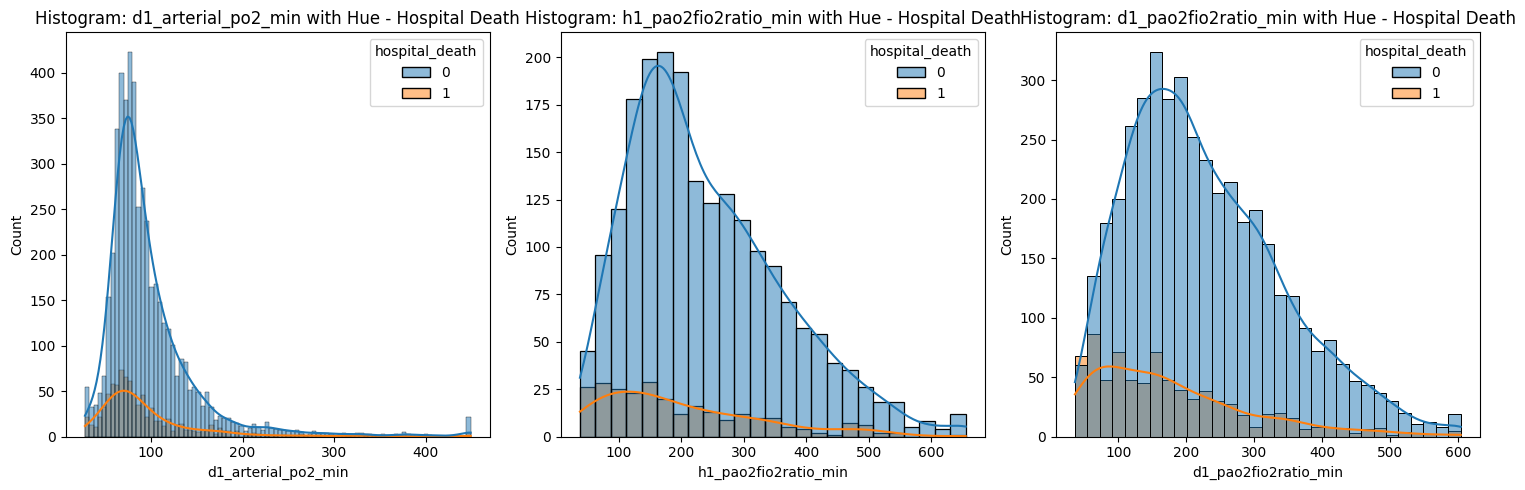

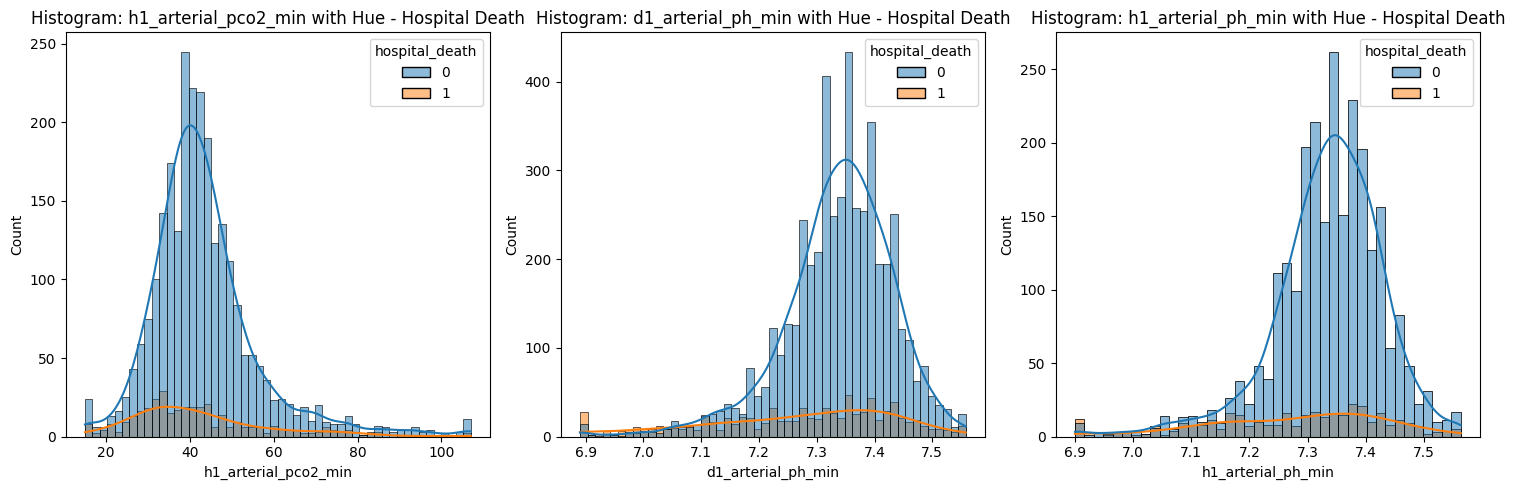

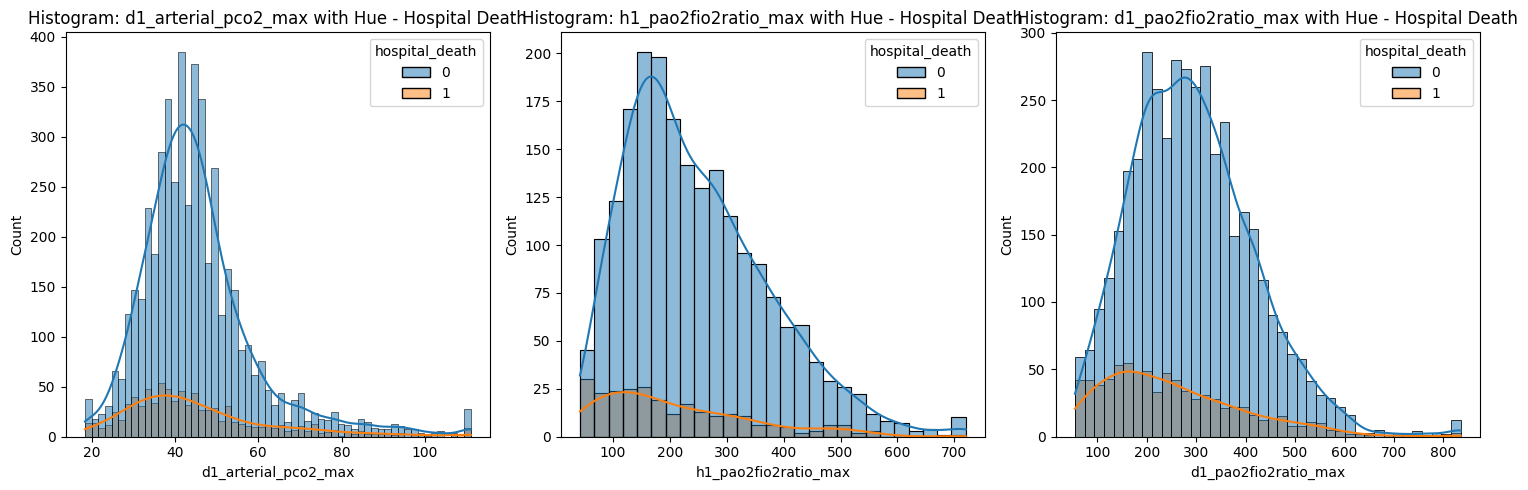

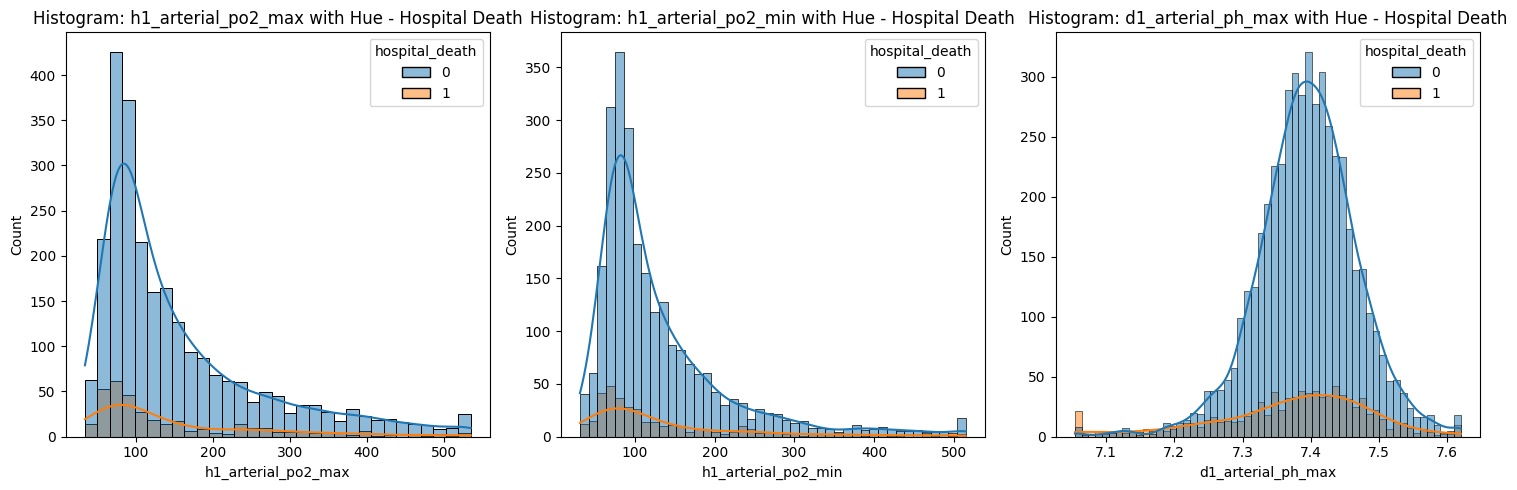

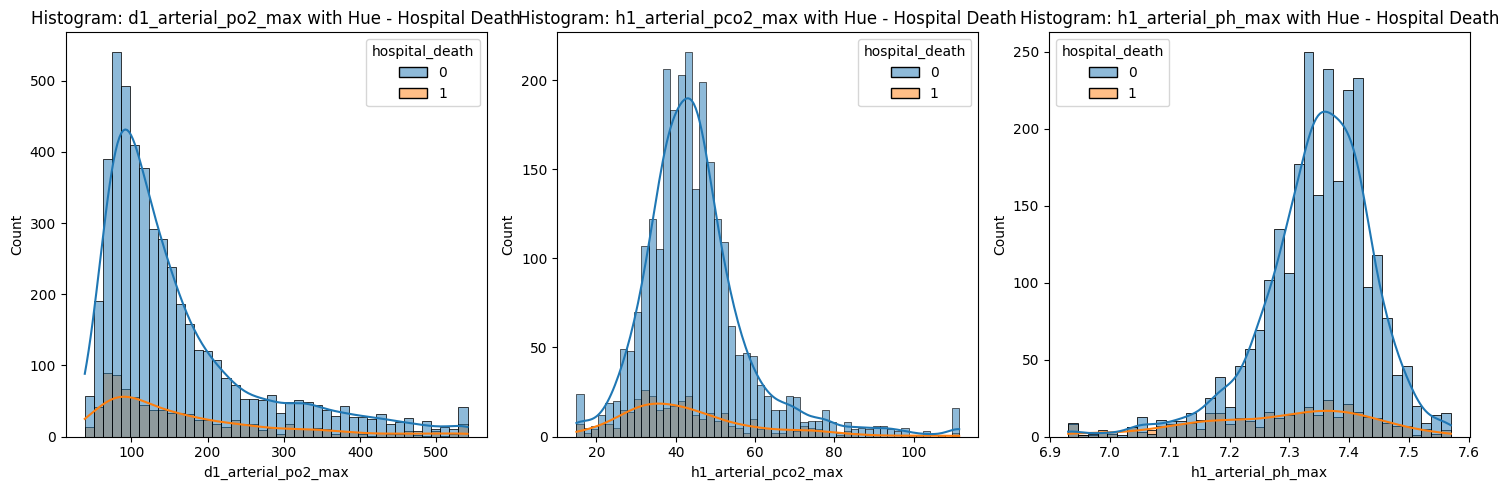

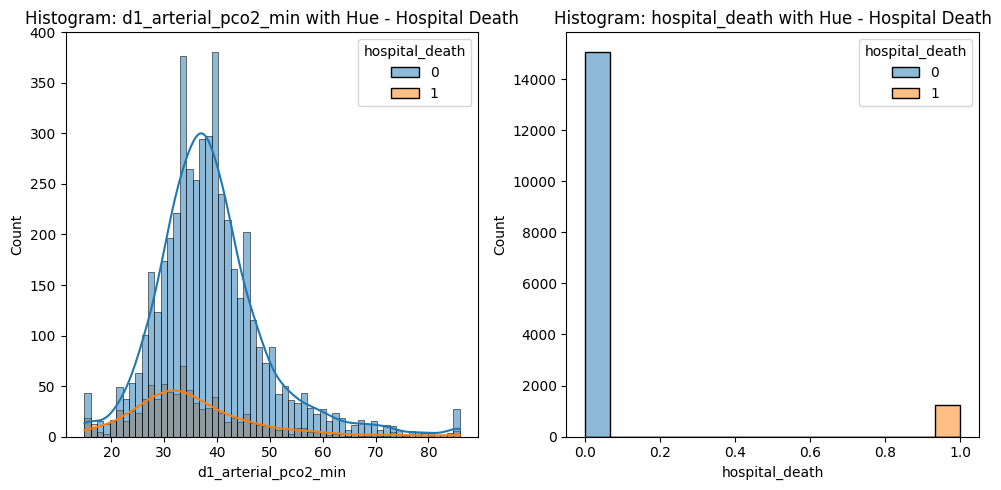

In [ ]:
# Get the regression columns from the DataFrame (excluding the target variable column)
regression_columns = category_df.columns[category_df.dtypes != 'object'].tolist()

num_columns = len(regression_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

# Create histograms for each regression column
for i, column in enumerate(regression_columns):
    if i % 3 == 0:
        plt.figure(figsize=(15, 5))  # Adjust the figure size if needed

    plt.subplot(1, 3, (i % 3) + 1)
    sns.histplot(data=category_df, x=column, hue=target_var, kde=True)
    plt.title(f'Histogram: {column} with Hue - Hospital Death')
    plt.xlabel(column)
    plt.ylabel('Count')

    if i % 3 == 2 or i == num_columns - 1:
        plt.tight_layout()  # Adjust the spacing between subplots
        plt.show()


In [ ]:
category = 'APACHE prediction'
category_df = apache_prediction_df

In [ ]:
category_rows = dictionary['Category'] == category
category_columns = ['Variable Name', 'Description']
print(dictionary.loc[category_rows, category_columns])

                     Variable Name  \
175  apache_4a_hospital_death_prob   
176       apache_4a_icu_death_prob   

                                           Description  
175  The APACHE IVa probabilistic prediction of in-...  
176  The APACHE IVa probabilistic prediction of in ...  


In [ ]:
# Count the number of classification columns
classification_columns = category_df.select_dtypes(include='object').columns
num_classification_columns = len(classification_columns)

# Count the number of regression columns
regression_columns = category_df.select_dtypes(exclude='object').columns
num_regression_columns = len(regression_columns)

print("Number of Classification Columns:", num_classification_columns)
print("Number of Regression Columns:", num_regression_columns)

Number of Classification Columns: 0
Number of Regression Columns: 3


In [ ]:
category_df.isna().sum()

apache_4a_icu_death_prob         858
apache_4a_hospital_death_prob    858
hospital_death                     0
dtype: int64

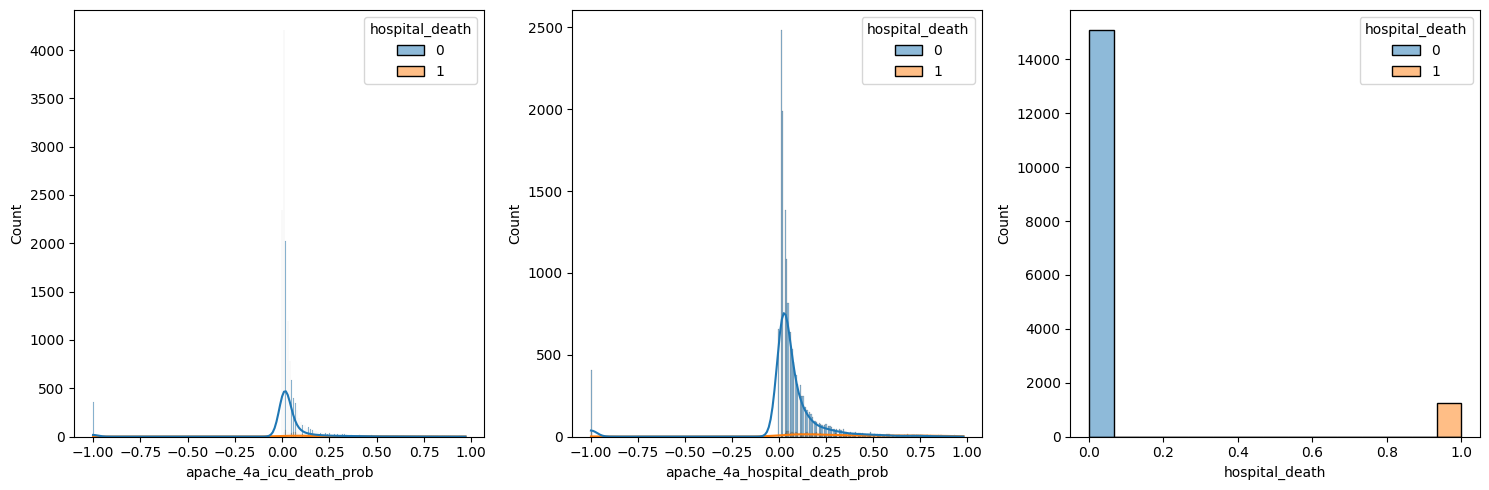

In [ ]:
# Get the regression columns from the DataFrame (excluding the target variable column)
regression_columns = category_df.columns[category_df.dtypes != 'object'].tolist()

num_columns = len(regression_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

# Create histograms for each regression column
for i, column in enumerate(regression_columns):
    if i % 3 == 0:
        plt.figure(figsize=(15, 5))  # Adjust the figure size if needed

    plt.subplot(1, 3, (i % 3) + 1)
    sns.histplot(data=category_df, x=column, hue=target_var, kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')

    if i % 3 == 2 or i == num_columns - 1:
        plt.tight_layout()  # Adjust the spacing between subplots
        plt.show()

In [ ]:
category = 'APACHE comorbidity'
category_df = apache_comorbidity_df

In [ ]:
category_rows = dictionary['Category'] == category
category_columns = ['Variable Name', 'Description']
print(dictionary.loc[category_rows, category_columns])

                   Variable Name  \
177                         aids   
178                    cirrhosis   
179            diabetes_mellitus   
180              hepatic_failure   
181            immunosuppression   
182                     leukemia   
183                     lymphoma   
184  solid_tumor_with_metastasis   

                                           Description  
177  Whether the patient has a definitive diagnosis...  
178  Whether the patient has a history of heavy alc...  
179  Whether the patient has been diagnosed with di...  
180  Whether the patient has cirrhosis and addition...  
181  Whether the patient has their immune system su...  
182  Whether the patient has been diagnosed with ac...  
183  Whether the patient has been diagnosed with no...  
184  Whether the patient has been diagnosed with an...  


In [ ]:
# Count the number of classification columns
classification_columns = category_df.select_dtypes(include='object').columns
num_classification_columns = len(classification_columns)

# Count the number of regression columns
regression_columns = category_df.select_dtypes(exclude='object').columns
num_regression_columns = len(regression_columns)

print("Number of Classification Columns:", num_classification_columns)
print("Number of Regression Columns:", num_regression_columns)

Number of Classification Columns: 0
Number of Regression Columns: 9


In [ ]:
category_df.isna().sum()

solid_tumor_with_metastasis    119
cirrhosis                      119
diabetes_mellitus              119
lymphoma                       119
hepatic_failure                119
immunosuppression              119
leukemia                       119
aids                           119
hospital_death                   0
dtype: int64

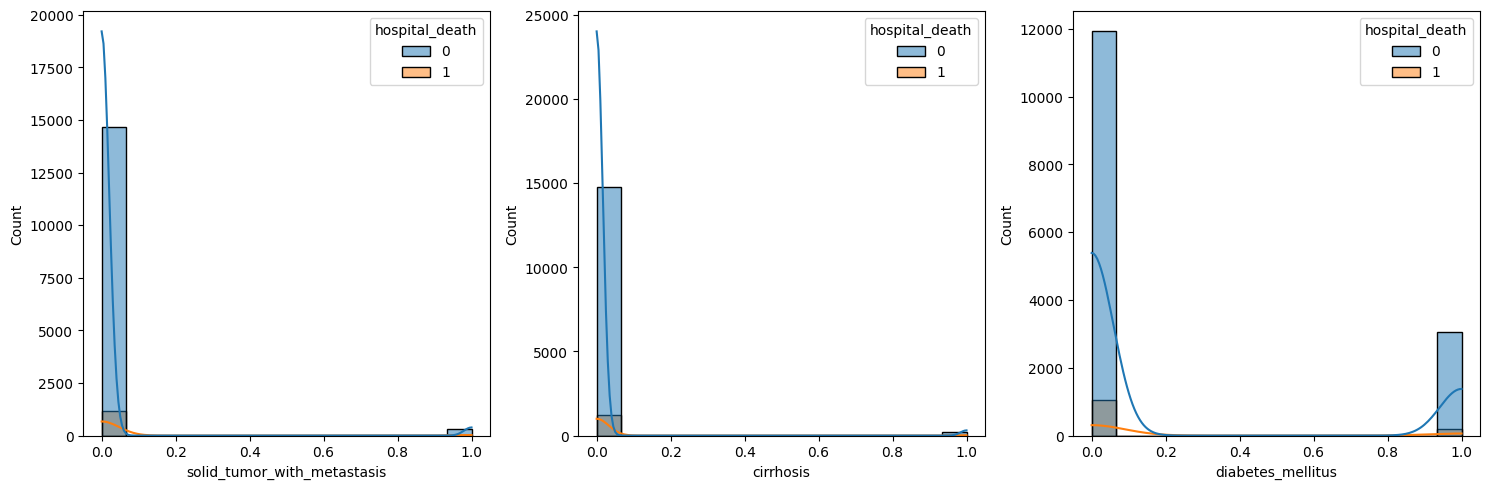

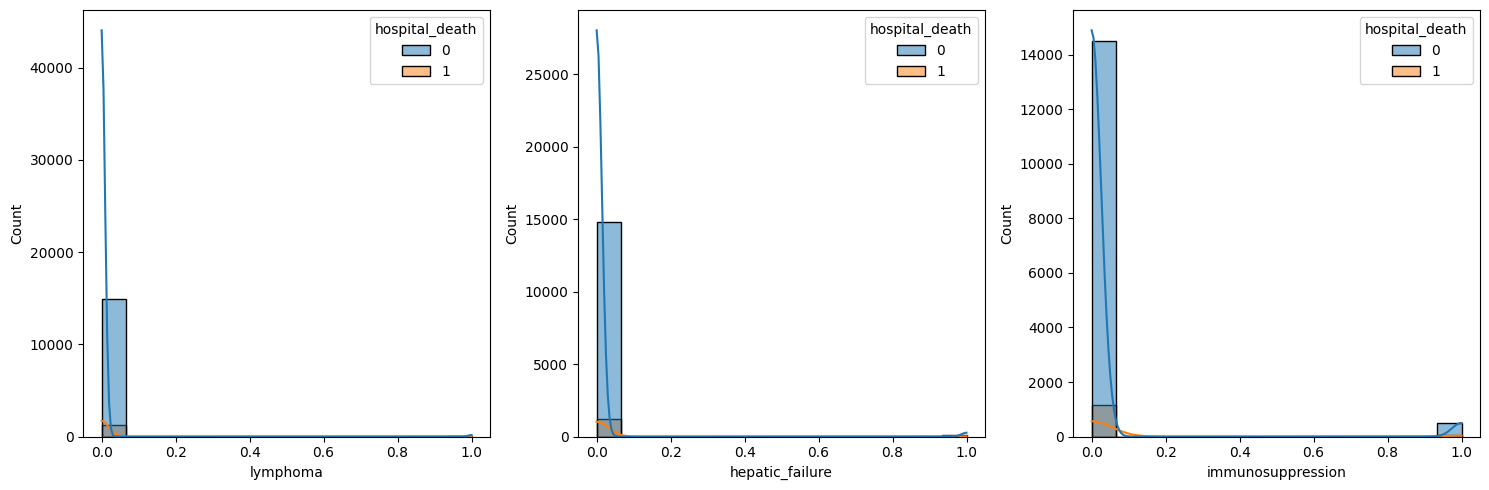

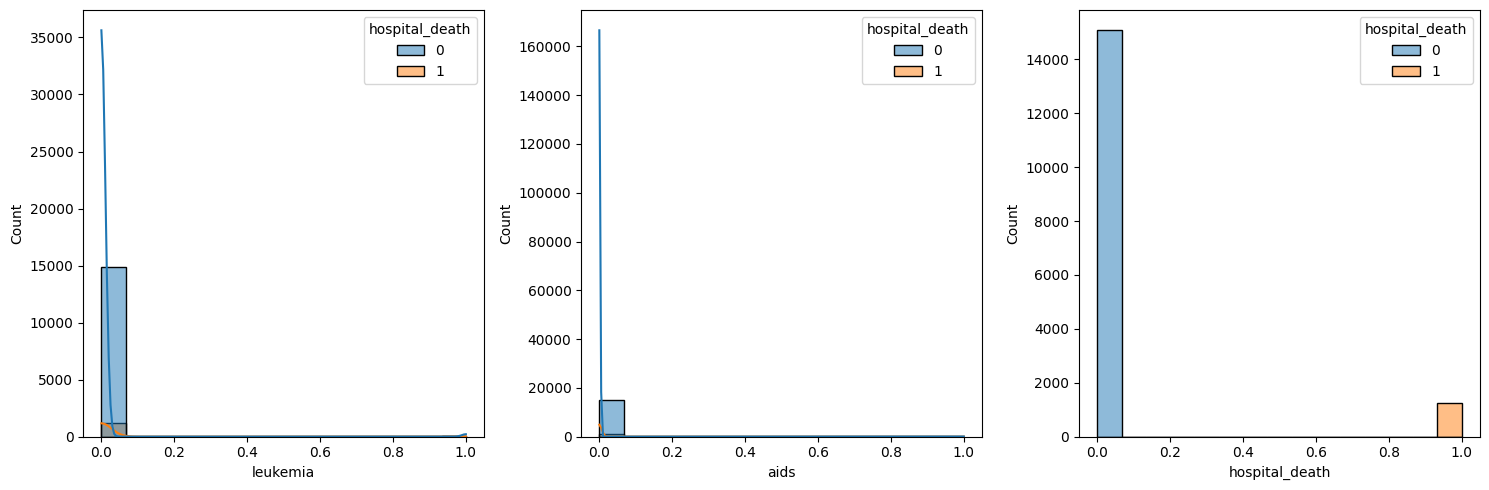

In [ ]:
# Get the regression columns from the DataFrame (excluding the target variable column)
regression_columns = category_df.columns[category_df.dtypes != 'object'].tolist()

num_columns = len(regression_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

# Create histograms for each regression column
for i, column in enumerate(regression_columns):
    if i % 3 == 0:
        plt.figure(figsize=(15, 5))  # Adjust the figure size if needed

    plt.subplot(1, 3, (i % 3) + 1)
    sns.histplot(data=category_df, x=column, hue=target_var, kde=True)
    plt.xlabel(column)
    plt.ylabel('Count')

    if i % 3 == 2 or i == num_columns - 1:
        plt.tight_layout()  # Adjust the spacing between subplots
        plt.show()

In [ ]:
category = 'APACHE grouping'
category_df = apache_grouping_df

In [ ]:
category_rows = dictionary['Category'] == category
category_columns = ['Variable Name', 'Description']
print(dictionary.loc[category_rows, category_columns])

            Variable Name                               Description
185  apache_3j_bodysystem  Admission diagnosis group for APACHE III
186   apache_2_bodysystem   Admission diagnosis group for APACHE II


In [ ]:
# Count the number of classification columns
classification_columns = category_df.select_dtypes(include='object').columns
num_classification_columns = len(classification_columns)

# Count the number of regression columns
regression_columns = category_df.select_dtypes(exclude='object').columns
num_regression_columns = len(regression_columns)

print("Number of Classification Columns:", num_classification_columns)
print("Number of Regression Columns:", num_regression_columns)

Number of Classification Columns: 2
Number of Regression Columns: 1


In [ ]:
classification_columns = category_df.columns[category_df.dtypes == 'object']
classification_unique_counts = category_df[classification_columns].nunique()
print(classification_unique_counts)

apache_3j_bodysystem    11
apache_2_bodysystem     10
dtype: int64


In [ ]:
category_df.isna().sum()

apache_3j_bodysystem    343
apache_2_bodysystem     343
hospital_death            0
dtype: int64

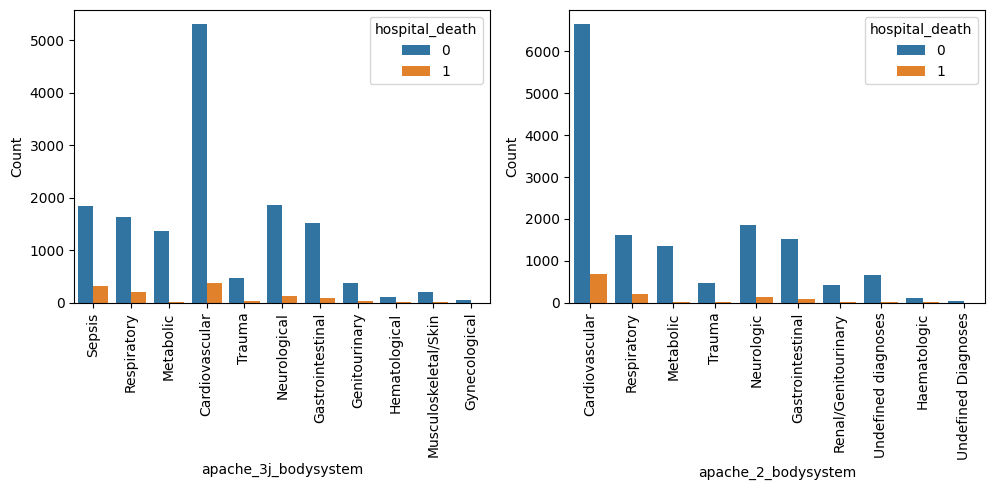

In [ ]:
# Get the classification columns from the DataFrame (excluding the target variable column)
classification_columns = category_df.columns[category_df.dtypes == 'object'].tolist()
num_columns = len(classification_columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

for i, column in enumerate(classification_columns):
    if i % 3 == 0:
        plt.figure(figsize=(15, 5))  # Adjust the figure size if needed

    plt.subplot(1, 3, (i % 3) + 1)
    sns.countplot(data=category_df, x=column, hue=target_var)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)

    if i % 3 == 2 or i == num_columns - 1:
        plt.tight_layout()  # Adjust the spacing between subplots
        plt.show() 